**Data Import and Structuring**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [2]:
# Combine data
from data_preprocess import adjust_and_copy_csvs, merge_activity_data_and_update_networks, process_datasets, process_activity_recording_to_csv

base_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/QuickCheck'
excel_filename = 'simple_check.xlsx'
process_activity_recording_to_csv(base_path, excel_filename)


source = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/CSVs'
destination = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/HomoCheck'
quickcheck = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/QuickCheck'

process_datasets(source, destination, quickcheck)

Data processing complete. Files have been saved in their respective directories.


In [3]:
# prepare ref file
from data_preprocess import make_reffile

source_excel_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/Reffiles/selected_Check.xlsx'
destination_excel_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/Reffiles/Reffile.xlsx'
make_reffile(source_excel_path, destination_excel_path)

In [4]:
# Load the combined data
from data_preprocess import merge_csvs, combine_all_data

base_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/HomoCheck'
ref_file_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/Reffiles/Reffile.xlsx'

# Process the data and get the combined DataFrames
combined_dataframes = merge_csvs(base_path, ref_file_path)

# Combine all DataFrames into one
data = combine_all_data(combined_dataframes)

Data processing completed for all directories
Final combined data shape: (1436, 28)


In [5]:
data.head()

,DIV,Well,NeuronType,Chip_ID,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_IBI,cov_IBI,...,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor,Burst_Peak_Abs,Burst_Peak_Normalized
0,5,1,MxHEMI,M07039,CDKL5-E6D_T1_C1_05152024,0.601701,72.853541,25.606061,11.740000,52.305887,...,0.0,1.267112,313.628048,0.073282,103.861536,0.357242,68.420284,178.884363,NaN,NaN
1,5,2,WT,M07039,CDKL5-E6D_T1_C1_05152024,1.005935,49.774901,15.848485,44.700000,0.000000,...,NaN,0.740302,289.047687,NaN,NaN,NaN,NaN,12.371173,NaN,NaN
2,5,3,FxHET,M07039,CDKL5-E6D_T1_C1_05152024,0.668804,68.087166,14.712121,42.716667,77.475001,...,0.0,0.976505,287.602414,0.048190,92.642437,0.345847,69.803350,41.171271,NaN,NaN
3,5,4,MxHEMI,M07039,CDKL5-E6D_T1_C1_05152024,0.465627,74.338109,21.621212,17.620000,39.863558,...,0.0,1.618887,295.330918,0.066445,107.517068,0.378431,66.455322,208.423889,NaN,NaN
4,5,5,WT,M07039,CDKL5-E6D_T1_C1_05152024,0.859133,48.574638,15.787879,NaN,NaN,...,NaN,0.866212,285.151705,NaN,NaN,NaN,NaN,14.770573,NaN,NaN


In [6]:
# select WT data
wt_data = data[data['NeuronType'] == 'WT']
wt_data['DIV'] = wt_data['DIV'].astype('int')
wt_data.shape

(694, 28)

In [7]:
# store WT data at specific path
wt_data.to_csv('/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/CSRA/QualityCheck/HomoCheck/wt_data.csv', index=False)

In [8]:
other_data = data[data['NeuronType'] != 'WT']
other_data['DIV'] = other_data['DIV'].astype('int')
other_data.to_csv('/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/CSRA/QualityCheck/HomoCheck/other_data.csv', index=False)

In [65]:
wt_data.head()

,DIV,Well,NeuronType,Chip_ID,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_IBI,cov_IBI,...,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor,Burst_Peak_Abs,Burst_Peak_Normalized
1,5,2,WT,M07039,CDKL5-E6D_T1_C1_05152024,1.005935,49.774901,15.848485,44.7,0.000000,...,NaN,0.740302,289.047687,NaN,NaN,NaN,NaN,12.371173,NaN,NaN
4,5,5,WT,M07039,CDKL5-E6D_T1_C1_05152024,0.859133,48.574638,15.787879,NaN,NaN,...,NaN,0.866212,285.151705,NaN,NaN,NaN,NaN,14.770573,NaN,NaN
6,5,1,WT,M07420,CDKL5-E6D_T1_C1_05152024,0.966328,60.385641,23.863636,29.1,106.383339,...,0.0,0.977964,351.166363,0.110062,129.623709,0.332086,71.646849,41.721689,NaN,NaN
7,5,2,WT,M07420,CDKL5-E6D_T1_C1_05152024,0.866217,62.207961,18.530303,180.0,0.000000,...,NaN,1.050997,388.106047,NaN,NaN,NaN,NaN,55.491613,NaN,NaN
8,5,3,WT,M07420,CDKL5-E6D_T1_C1_05152024,0.973242,59.716902,18.030303,66.9,75.009672,...,0.0,0.963180,344.971740,0.083943,159.761376,0.331156,73.224236,56.761980,NaN,NaN


In [66]:
# check div 21
# Assuming 'Trial' is a column, find unique trials
trials = wt_data['Trial'].unique()

# Define the DIV range
div_range = range(19, 25)  # This will include 20, 21, 22, 23, 24, 25

# Prepare to check for DIV presence in each trial
results = {}

for trial in trials:
    # Filter the wt data for the current trial
    trial_data = wt_data[wt_data['Trial'] == trial]
    present_divs = [div for div in div_range if any(trial_data['DIV'] == div)]
    
    # Store the results with a format
    if present_divs:
        results[trial] = f"div {', '.join(map(str, present_divs))} present in trial {trial}"
    else:
        results[trial] = f"No divs from {div_range.start} to {div_range.stop - 1} present in trial {trial}"

# Output the formatted results
for trial, result in results.items():
    print(result)

div 20, 23 present in trial CDKL5-E6D_T1_C1_05152024
div 19, 22 present in trial SYNGAP1_T1_C1_03212024
div 21 present in trial ADNP_T2_10262023
div 21, 24 present in trial KCNT1_T3_C1_03122024
div 20, 23 present in trial SPTAN1_T1_07192023
div 21, 24 present in trial KCNT1_T1_08082023
div 21, 24 present in trial ADNP_T3_11072023
div 20, 23 present in trial SHANK3_T1_11222023
div 21 present in trial ADNP_T4_C1_06282024
div 21 present in trial CHD8_T2_C1_08252023


In [67]:
# check div dtype
wt_data.dtypes

DIV                        int64
Well                      object
NeuronType                object
Chip_ID                   object
Trial                     object
Mean_FiringRate          float64
Mean_SpikeAmplitude      float64
Active_area              float64
mean_IBI                 float64
cov_IBI                  float64
mean_Burst_Peak          float64
cov_Burst_Peak           float64
Number_Bursts              int64
mean_Spike_per_Burst     float64
cov_Spike_per_Burst      float64
mean_Burst_Peak_Abs      float64
cov_Burst_Peak_Abs       float64
mean_BurstDuration       float64
cov_BurstDuration        float64
MeanNetworkISI           float64
CoVNetworkISI            float64
MeanWithinBurstISI       float64
CoVWithinBurstISI        float64
MeanOutsideBurstISI      float64
CoVOutsideBurstISI       float64
Fanofactor               float64
Burst_Peak_Abs           float64
Burst_Peak_Normalized    float64
dtype: object

In [68]:
# Select data for DIVs between 19 and 24
trials = wt_data['Trial'].unique()

# Prepare a DataFrame to store selected data
selected_data = pd.DataFrame()

for trial in trials:
    # Data for the current trial
    trial_data = wt_data[wt_data['Trial'] == trial]

    # Filter data for DIVs between 19 and 24
    filtered_data = trial_data[(trial_data['DIV'] >= 19) & (trial_data['DIV'] <= 24)]

    # Append the filtered rows to the final DataFrame
    selected_data = pd.concat([selected_data, filtered_data], ignore_index=True)

    # If filtered data is not empty, print the unique DIVs selected for this trial
    if not filtered_data.empty:
        unique_divs = filtered_data['DIV'].unique()
        print(f"Selected DIVs {list(unique_divs)} for trial {trial}")

Selected DIVs [20, 23] for trial CDKL5-E6D_T1_C1_05152024
Selected DIVs [19, 22] for trial SYNGAP1_T1_C1_03212024
Selected DIVs [21] for trial ADNP_T2_10262023
Selected DIVs [21, 24] for trial KCNT1_T3_C1_03122024
Selected DIVs [20, 23] for trial SPTAN1_T1_07192023
Selected DIVs [21, 24] for trial KCNT1_T1_08082023
Selected DIVs [21, 24] for trial ADNP_T3_11072023
Selected DIVs [20, 23] for trial SHANK3_T1_11222023
Selected DIVs [21] for trial ADNP_T4_C1_06282024
Selected DIVs [21] for trial CHD8_T2_C1_08252023


In [69]:
# select trials
trials = ['ADNP_T4_C1_06282024','CDKL5-E6D_T1_C1_05152024', 'KCNT1_T3_C1_03122024','SHANK3_T1_11222023','KCNT1_T1_08082023','SYNGAP1_T1_C1_03212024']
small_trials_data = selected_data[selected_data['Trial'].isin(trials)]
# # All trials without ADNP_T3_11072023
# all_trials_data = selected_data[selected_data['Trial'] != 'ADNP_T3_11072023']
all_trials_data = selected_data

**Exploratory Data Analysis (EDA)**

Selected features: Activity area, Spike Amplitude, Firing Rate, network: ..., ISI

In [70]:
selected_data.columns

Index(['DIV', 'Well', 'NeuronType', 'Chip_ID', 'Trial', 'Mean_FiringRate',
       'Mean_SpikeAmplitude', 'Active_area', 'mean_IBI', 'cov_IBI',
       'mean_Burst_Peak', 'cov_Burst_Peak', 'Number_Bursts',
       'mean_Spike_per_Burst', 'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs',
       'cov_Burst_Peak_Abs', 'mean_BurstDuration', 'cov_BurstDuration',
       'MeanNetworkISI', 'CoVNetworkISI', 'MeanWithinBurstISI',
       'CoVWithinBurstISI', 'MeanOutsideBurstISI', 'CoVOutsideBurstISI',
       'Fanofactor', 'Burst_Peak_Abs', 'Burst_Peak_Normalized'],
      dtype='object')

In [71]:
# select features
# basic_info = ['DIV', 'Well', 'Chip_ID', 'NeuronType', 'Trial']
basic_info = ['Trial']
# basic_features = ['Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area',
#             'mean_Burst_Peak', 'Number_Bursts', 'mean_BurstDuration']
basic_features = ['Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area',
            'mean_Burst_Peak', 'Number_Bursts', 'mean_Spike_per_Burst']

advanced_features = ['Mean_FiringRate',	'Mean_SpikeAmplitude',	'Active_area', 'mean_IBI', 'Number_Bursts', 'mean_Spike_per_Burst', 'mean_BurstDuration','mean_Burst_Peak',
                     'mean_Burst_Peak_Abs','MeanNetworkISI','MeanWithinBurstISI', 'MeanOutsideBurstISI', 'Fanofactor', 'Burst_Peak_Abs']

basic_data = all_trials_data[basic_info + basic_features]

advanced_data = small_trials_data[basic_info + advanced_features]
advanced_data['Number_Bursts'] = advanced_data['Number_Bursts'].astype('float64')

In [72]:
print(basic_data.to_string())

                        Trial  Mean_FiringRate  Mean_SpikeAmplitude  Active_area  mean_Burst_Peak  Number_Bursts  mean_Spike_per_Burst
0    CDKL5-E6D_T1_C1_05152024         1.983021            97.197132    88.590909         9.958695            113           5017.610619
1    CDKL5-E6D_T1_C1_05152024         1.613199            89.469344    83.454545         9.131061             82           4154.536585
2    CDKL5-E6D_T1_C1_05152024         1.781625           112.321619    93.515152         8.487390            111           4231.513514
3    CDKL5-E6D_T1_C1_05152024         2.140018           123.103925    88.878788         8.111178             97           3217.453608
4    CDKL5-E6D_T1_C1_05152024         2.475439           105.979421    95.348485         7.405860            124           6758.491935
5    CDKL5-E6D_T1_C1_05152024         2.200255           145.514002    96.303030        11.510904             97           5369.896907
6    CDKL5-E6D_T1_C1_05152024         1.882157         

In [73]:
# count missing values
missing_values = basic_data.isnull().sum()
missing_values
# look at missing values
missing_data = basic_data[basic_data.isnull().any(axis=1)]
missing_data

,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_Burst_Peak,Number_Bursts,mean_Spike_per_Burst


In [74]:
# count missing values
missing_values = advanced_data.isnull().sum()
missing_values
# look at missing values
missing_data = advanced_data[advanced_data.isnull().any(axis=1)]
missing_data

,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_IBI,Number_Bursts,mean_Spike_per_Burst,mean_BurstDuration,mean_Burst_Peak,mean_Burst_Peak_Abs,MeanNetworkISI,MeanWithinBurstISI,MeanOutsideBurstISI,Fanofactor,Burst_Peak_Abs
0,CDKL5-E6D_T1_C1_05152024,1.983021,97.197132,88.590909,2.658929,113.0,5017.610619,0.472566,9.958695,4705.703720,0.398187,0.049217,0.158023,1073.250631,NaN
1,CDKL5-E6D_T1_C1_05152024,1.613199,89.469344,83.454545,3.682716,82.0,4154.536585,0.457317,9.131061,3373.967648,0.516129,0.046678,0.149487,823.077234,NaN
2,CDKL5-E6D_T1_C1_05152024,1.781625,112.321619,93.515152,2.690000,111.0,4231.513514,0.436036,8.487390,4099.740491,0.427575,0.046590,0.139338,978.663563,NaN
3,CDKL5-E6D_T1_C1_05152024,2.140018,123.103925,88.878788,3.117708,97.0,3217.453608,0.396907,8.111178,3537.079643,0.489701,0.033181,0.147725,795.637149,NaN
4,CDKL5-E6D_T1_C1_05152024,2.475439,105.979421,95.348485,2.406504,124.0,6758.491935,0.736290,7.405860,4124.119538,0.376480,0.058735,0.173210,788.972594,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,ADNP_T4_C1_06282024,1.438356,91.525124,75.242424,2.815094,107.0,3729.719626,0.452336,8.771013,5695.458771,0.505707,0.034078,0.170443,1104.102368,NaN
139,ADNP_T4_C1_06282024,1.644442,112.437583,80.348485,4.035616,74.0,7047.135135,0.587838,11.519070,5494.091499,0.416269,0.049377,0.150824,1238.193560,NaN
140,ADNP_T4_C1_06282024,1.373502,86.714779,69.621212,3.585542,84.0,4575.523810,0.509524,8.609956,4754.523365,0.479494,0.047761,0.147122,844.004264,NaN
141,ADNP_T4_C1_06282024,1.202521,85.167516,62.151515,3.370455,89.0,3337.505618,0.424719,7.576762,4184.923622,0.615371,0.036685,0.178425,798.191898,NaN


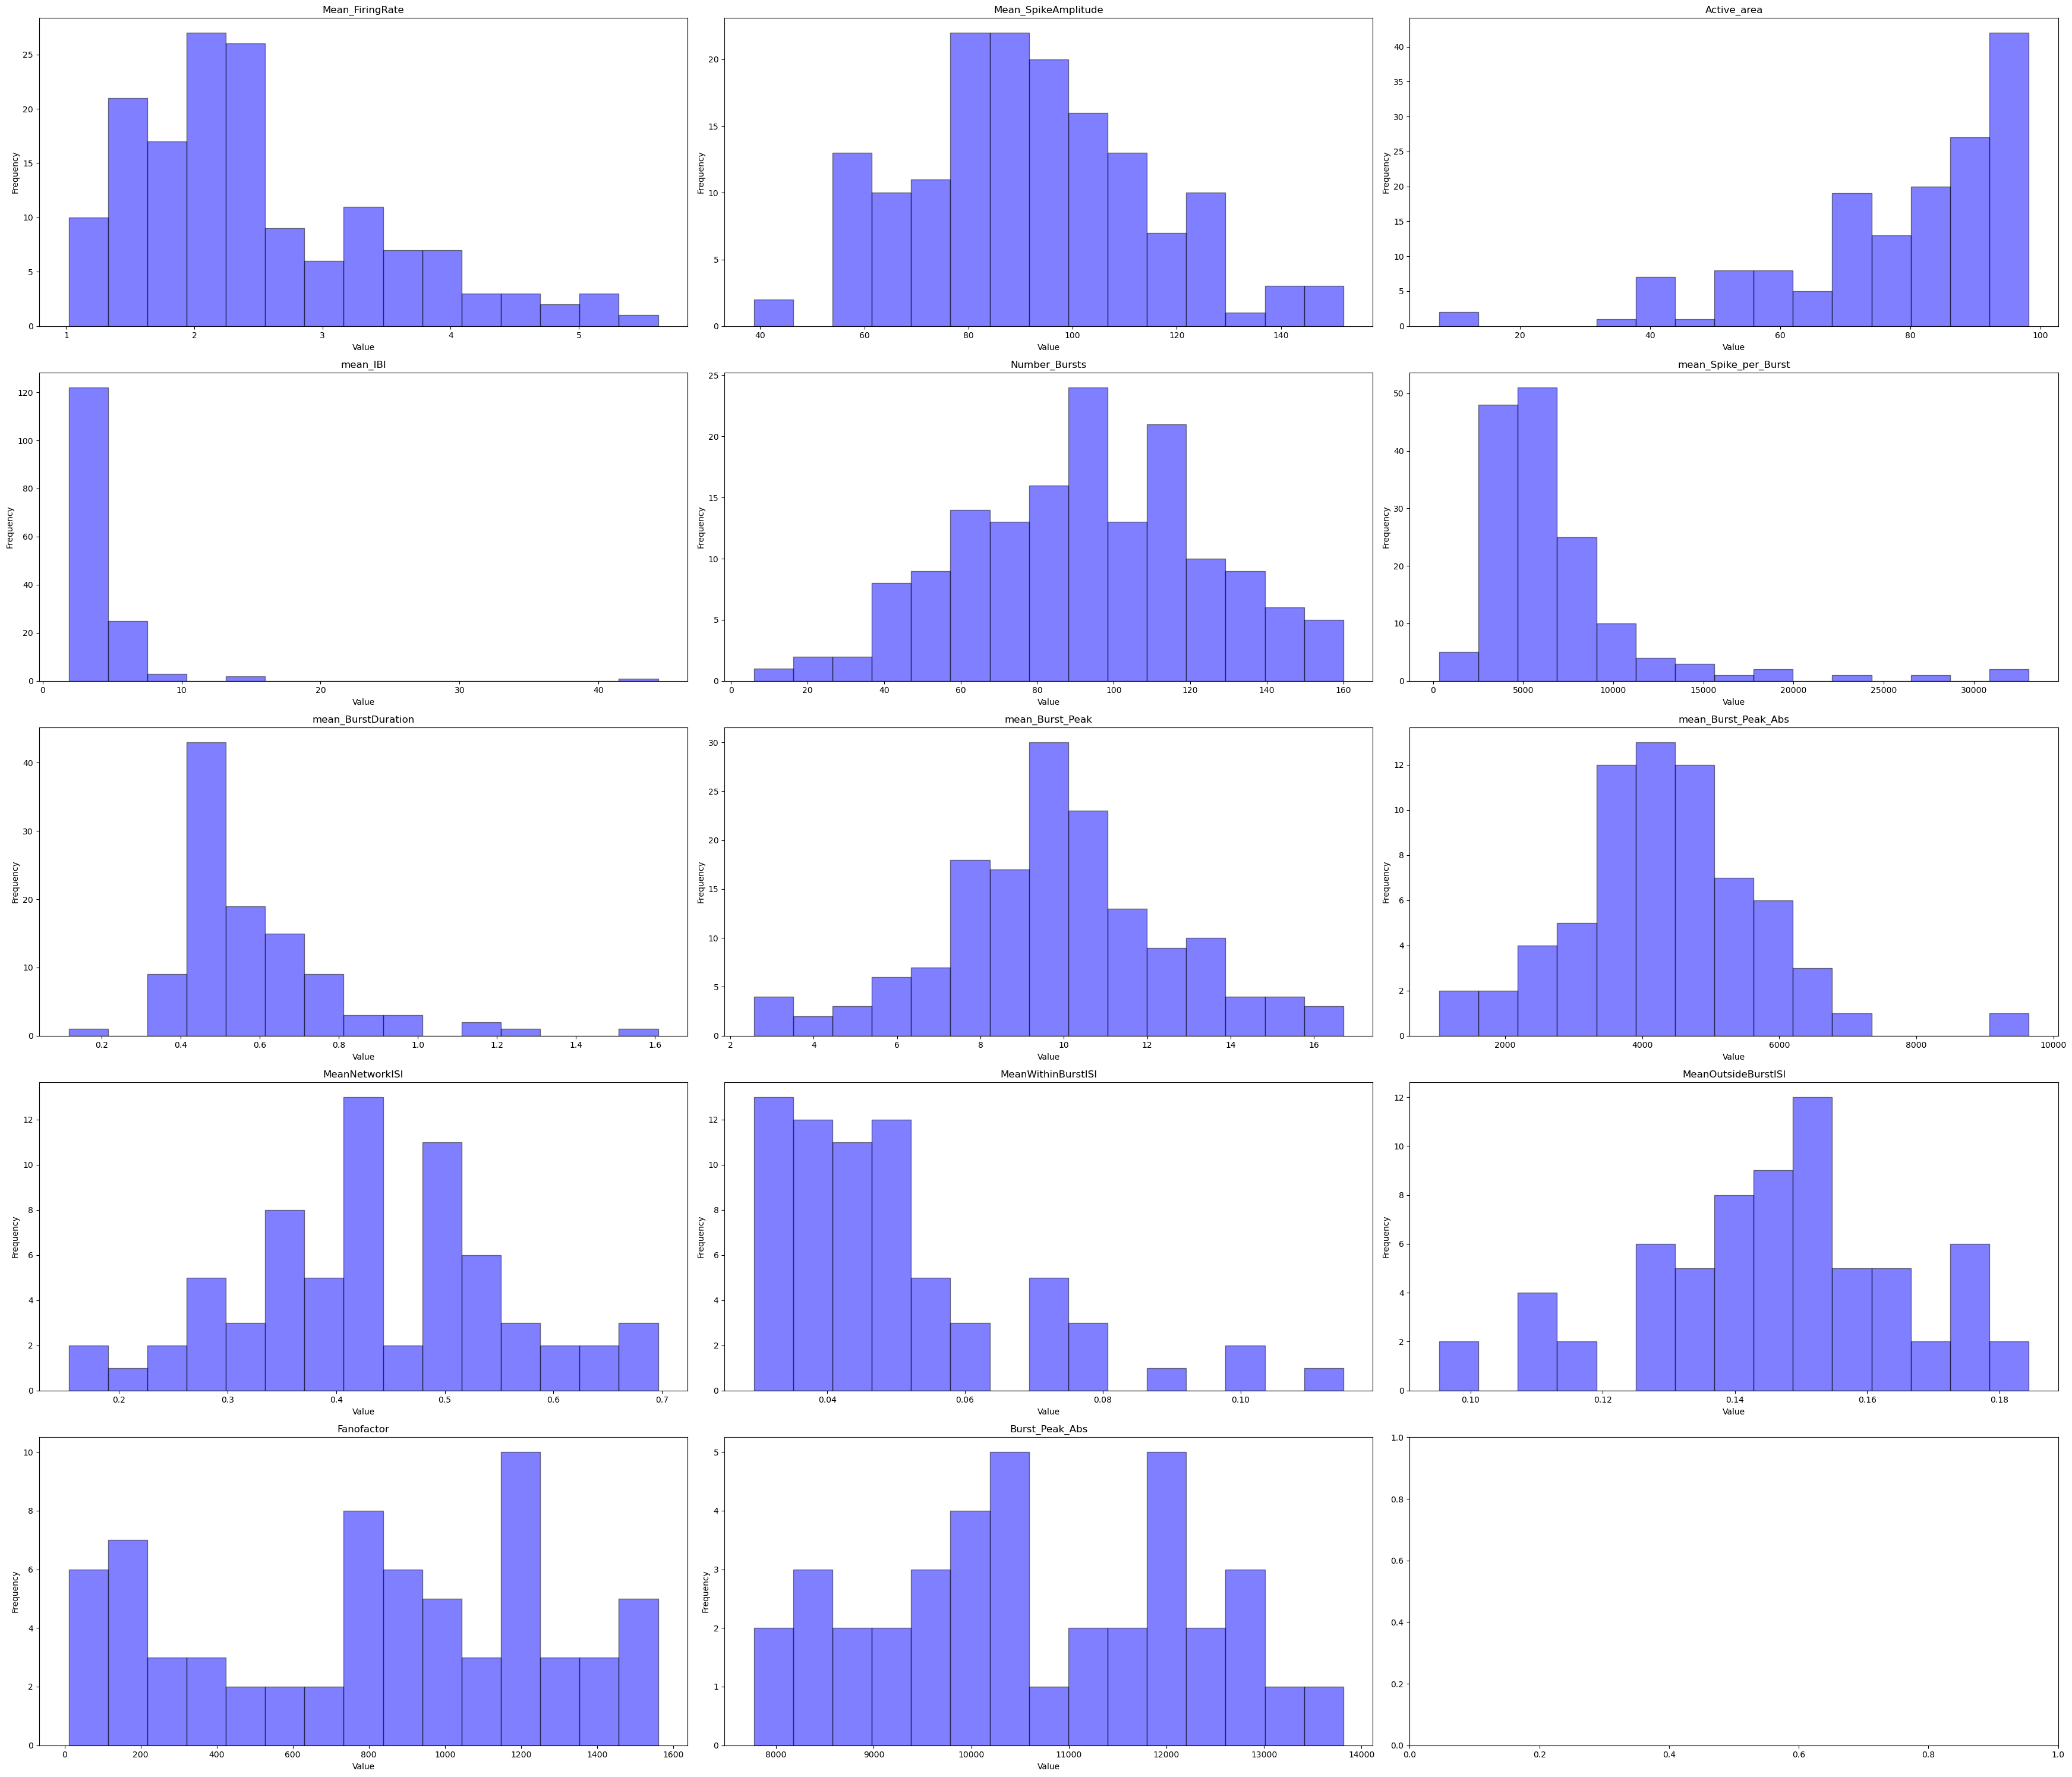

In [75]:
# Check distribution of all features in overall dataset
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(35, 30))

for ax, feature in zip(axes.flatten(), advanced_features):
    ax.hist(all_trials_data[feature], bins=15, color='blue', alpha=0.5, edgecolor='black')
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

fig.tight_layout()
plt.show()

**Statistical Testing for Homogeneity**

**LDA**

In [76]:
basic_data.isna().sum()

Trial                   0
Mean_FiringRate         0
Mean_SpikeAmplitude     0
Active_area             0
mean_Burst_Peak         0
Number_Bursts           0
mean_Spike_per_Burst    0
dtype: int64

In [77]:
basic_data.dtypes

Trial                    object
Mean_FiringRate         float64
Mean_SpikeAmplitude     float64
Active_area             float64
mean_Burst_Peak         float64
Number_Bursts             int64
mean_Spike_per_Burst    float64
dtype: object

In [78]:
# import pandas as pd

# # Import the functions from the lda_visualization module
# from lda_visualization import plot_biplot, plot_density, lda_plot

# # Example usage of the functions
# def main():

#     # Define the features you want to analyze
#     feature_names = basic_features

#     # Specify the column you want to analyze
#     group_column = 'Trial'  

#     # Load data to make sure it fits your requirements
#     data = basic_data

#     # Now call the function with the data
#     if len(data[group_column].unique()) == 2:
#         plot_density(data, feature_names, group_column)
#     elif len(data[group_column].unique()) > 2:
#         plot_biplot(data, feature_names, group_column)

# # This ensures the main function runs only if this file is executed as the main program.
# if __name__ == "__main__": # 
#     main()

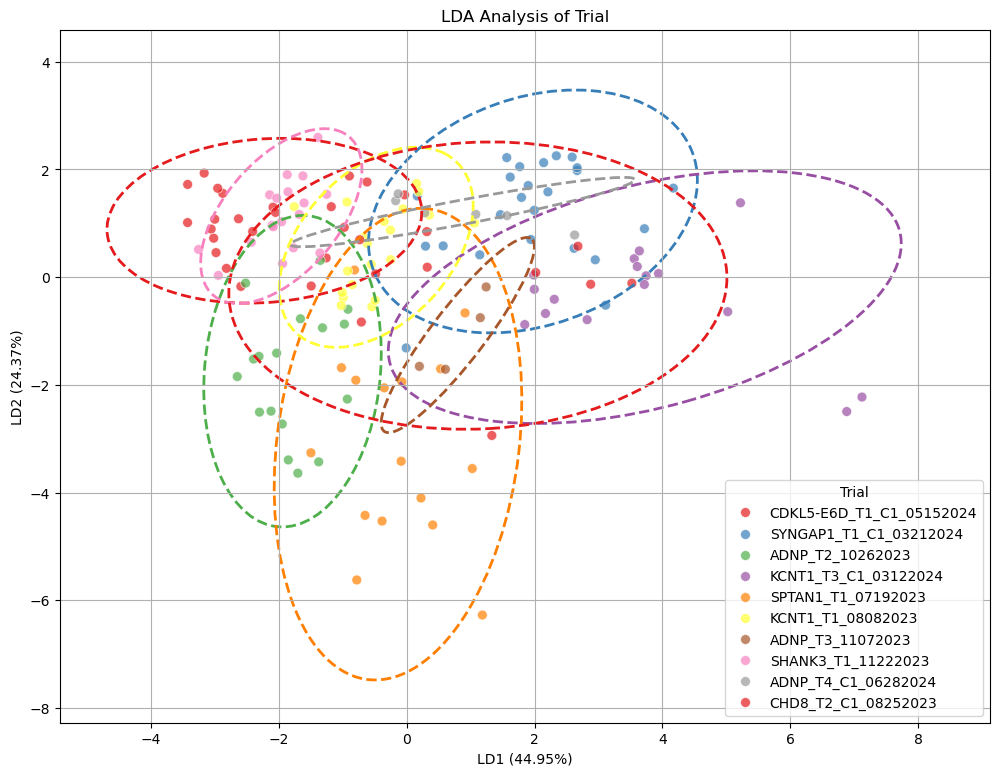

In [79]:
from lda_visualization import plot_biplot, plot_density, lda_plot

feature_names = basic_features

group_column = 'Trial'  

# Load data 
data = basic_data

# call the function with the data
if len(data[group_column].unique()) == 2:
    plot_density(data, feature_names, group_column)
elif len(data[group_column].unique()) > 2:
    plot_biplot(data, feature_names, group_column)

In [80]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# lda = LDA(n_components=2)  # Assuming you are looking for 2 components
# X = advanced_data[advanced_features]  # ensure 'feature_names' contains the correct features to transform
# y = advanced_data['Trial']  # 'group_column' should be the column based on which LDA is performed

# X_lda = lda.fit_transform(X, y)
# advanced_data['LD1'], advanced_data['LD2'] = X_lda[:, 0], X_lda[:, 1]

# # Check if the necessary columns are present
# if 'LD1' in advanced_data.columns and 'LD2' in advanced_data.columns:
#     for group in advanced_data['Trial'].unique():
#         sub_data = advanced_data[advanced_data['Trial'] == group]
#         covariance = np.cov(sub_data[['LD1', 'LD2']].T)

#         print("Sub-data shape:", sub_data.shape)
#         print("Covariance matrix:\n", covariance)
#         print("Determinant of covariance matrix:", np.linalg.det(covariance))

#         try:
#             lambda_, v = np.linalg.eig(covariance)
#         except np.linalg.LinAlgError as e:
#             print("Failed to compute eigenvalues:", e)
#             raise
# else:
#     print("LD1 and LD2 columns are missing in the DataFrame. Check the LDA transformation step.")

# # Add these checks just before the eigenvalue calculation:
# if np.isnan(covariance).any() or np.isinf(covariance).any():
#     print("Covariance contains NaN or inf:", covariance)


**K means clustering**

**Multivariate Assessment**

***Assessment of Normality***

Shapiro-Wilk Test or Kolmogorov-Smirnov Test can be used to assess whether each feature follows a normal distribution across trials. This will help determine whether parametric or non-parametric tests should be applied.

In [81]:
# Shapiro-Wilk test
from scipy.stats import shapiro

# Initialize a dictionary to store the results
normality_results = {}

# Perform the Shapiro-Wilk test for each feature
for feature in basic_features:
    stat, p_value = shapiro(basic_data[feature])
    normality_results[feature] = {'Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better readability
normality_test_df = pd.DataFrame(normality_results).T
normality_test_df

,Statistic,p-value
Mean_FiringRate,0.918540,1.355997e-07
Mean_SpikeAmplitude,0.990177,3.662469e-01
Active_area,0.871758,3.365037e-10
mean_Burst_Peak,0.986763,1.541877e-01
Number_Bursts,0.992550,6.124413e-01
mean_Spike_per_Burst,0.672554,5.220825e-17


In [82]:
# Kolmogorov-Smirnov test
from scipy.stats import kstest
import pandas as pd

ks_results = {}

for feature in basic_features:
    # Standardize the data before performing the test
    standardized_data = (basic_data[feature] - basic_data[feature].mean()) / basic_data[feature].std()
    stat, p_value = kstest(standardized_data, 'norm')
    ks_results[feature] = {'Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better readability
ks_test_df = pd.DataFrame(ks_results).T
ks_test_df

,Statistic,p-value
Mean_FiringRate,0.148556,2.063919e-03
Mean_SpikeAmplitude,0.044346,9.110610e-01
Active_area,0.138597,5.019209e-03
mean_Burst_Peak,0.055484,7.125149e-01
Number_Bursts,0.039863,9.601712e-01
mean_Spike_per_Burst,0.216796,8.584210e-07


Most of the features, except for "Number of Bursts" and possibly "Mean Burst Peak," do not appear to be normally distributed based on the Shapiro-Wilk test results. This information is crucial for further statistical analyses, as many parametric tests assume normality of the data.

However, all of these features appear to be normally distributed based on Kolmogorov-Smirnov (KS) test.

**Univariate Assessment**

First, we can select one feature, namely Active_area for analysis.

In [83]:
# Initialize a dictionary to store results
results = {}

# Group data by 'Trial'
grouped = basic_data.groupby('Trial')

# Perform tests for each trial
for trial, group in grouped:
    active_area_data = group['Active_area']
    mean, std = active_area_data.mean(), active_area_data.std()
    
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = shapiro(active_area_data)
    shapiro_result = 'Normal' if shapiro_p >= 0.05 else 'Not Normal'
    
    # Kolmogorov-Smirnov test
    ks_stat, ks_p = kstest(active_area_data, 'norm', args=(mean, std))
    ks_result = 'Normal' if ks_p >= 0.05 else 'Not Normal'
    
    # Store results
    results[trial] = {
        'Shapiro-Wilk Statistic': shapiro_stat,
        'Shapiro-Wilk p-value': shapiro_p,
        'Shapiro-Wilk Result': shapiro_result,
        'Kolmogorov-Smirnov Statistic': ks_stat,
        'Kolmogorov-Smirnov p-value': ks_p,
        'Kolmogorov-Smirnov Result': ks_result
    }

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results).T
results_df

,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,Shapiro-Wilk Result,Kolmogorov-Smirnov Statistic,Kolmogorov-Smirnov p-value,Kolmogorov-Smirnov Result
ADNP_T2_10262023,0.888424,0.043646,Not Normal,0.186178,0.536951,Normal
ADNP_T3_11072023,0.985943,0.935875,Normal,0.176349,0.99733,Normal
ADNP_T4_C1_06282024,0.928652,0.569736,Normal,0.21598,0.890552,Normal
CDKL5-E6D_T1_C1_05152024,0.905263,0.037932,Not Normal,0.176125,0.451198,Normal
CHD8_T2_C1_08252023,0.926019,0.409898,Normal,0.176298,0.863776,Normal
KCNT1_T1_08082023,0.878499,0.016628,Not Normal,0.186236,0.438756,Normal
KCNT1_T3_C1_03122024,0.782578,0.001614,Not Normal,0.221172,0.360273,Normal
SHANK3_T1_11222023,0.888404,0.036241,Not Normal,0.154818,0.725143,Normal
SPTAN1_T1_07192023,0.971454,0.861582,Normal,0.104606,0.986989,Normal
SYNGAP1_T1_C1_03212024,0.928781,0.09156,Normal,0.161851,0.504762,Normal


***Assessment of Homogeneity of Variance***

Use tests like Levene’s Test or Bartlett’s Test to check the homogeneity of variances across trials, which is an assumption for ANOVA.

In [84]:
# Levene's test
import pandas as pd
from scipy.stats import levene
import numpy as np


# Group data by 'Trial' and extract 'Active_area' values for each group
groups = [group['Active_area'].values for name, group in basic_data.groupby('Trial')]

# Perform Levene's test for homogeneity of variances
stat, p_value = levene(*groups)

print(f"Levene's Test Statistic: {stat:.3f}")
print(f"Levene's Test p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Suggests heterogeneity of variances.")
else:
    print("Fail to reject the null hypothesis: Suggests homogeneity of variances.")

Levene's Test Statistic: 6.049
Levene's Test p-value: 0.000
Reject the null hypothesis: Suggests heterogeneity of variances.


In [85]:
# Bartlett’s Test

from scipy.stats import bartlett
# Group data by 'Trial' and extract 'Active_area' values for each group
groups = [group['Active_area'].values for name, group in basic_data.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
stat, p_value = bartlett(*groups)

print(f"Bartlett’s Test Statistic: {stat:.3f}")
print(f"Bartlett’s Test p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Suggests heterogeneity of variances.")
else:
    print("Fail to reject the null hypothesis: Suggests homogeneity of variances.")

Bartlett’s Test Statistic: 101.537
Bartlett’s Test p-value: 0.000
Reject the null hypothesis: Suggests heterogeneity of variances.


<Figure size 1500x1200 with 0 Axes>

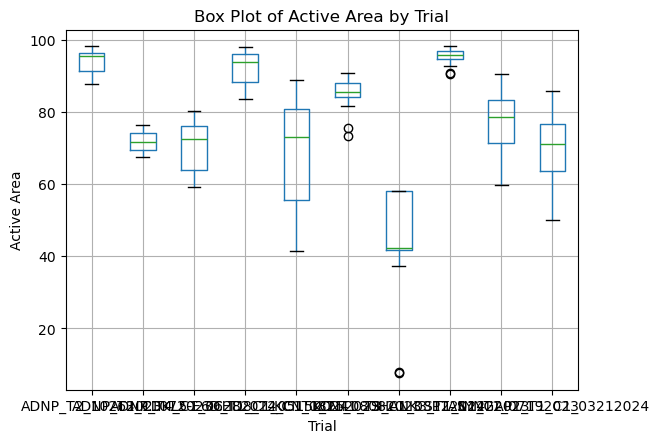

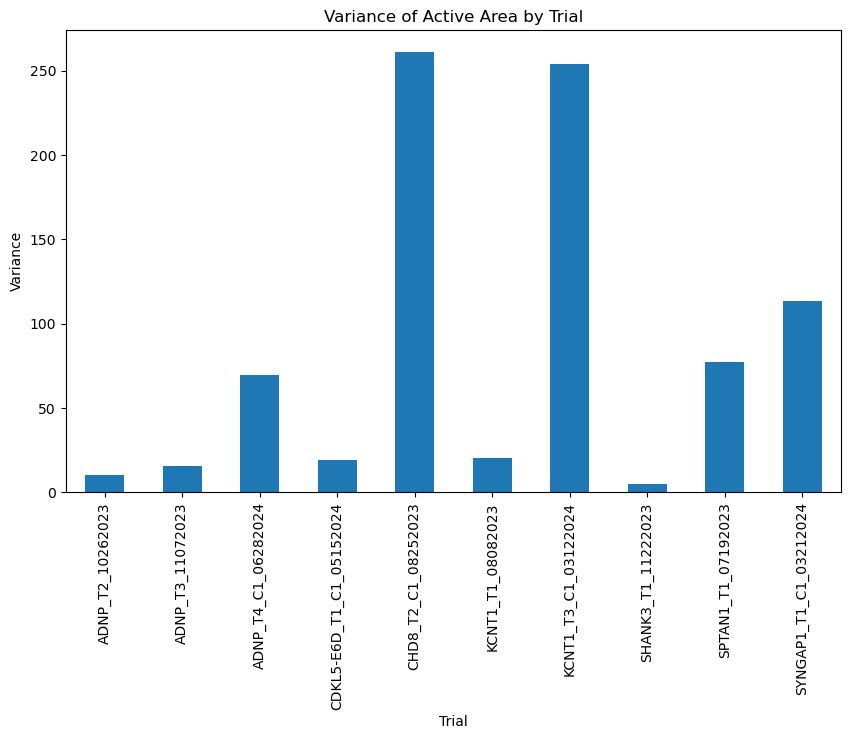

In [86]:
# Plotting Box Plots
plt.figure(figsize=(15, 12))
basic_data.boxplot(column='Active_area', by='Trial')
plt.title('Box Plot of Active Area by Trial')
plt.suptitle('')  # Remove default suptitle to clean up plot appearance
plt.xlabel('Trial')
plt.ylabel('Active Area')
plt.show()

# Calculating and Plotting Variances
group_variances = basic_data.groupby('Trial')['Active_area'].var()
plt.figure(figsize=(10, 6))
group_variances.plot(kind='bar')
plt.title('Variance of Active Area by Trial')
plt.xlabel('Trial')
plt.ylabel('Variance')
plt.show()

In [87]:
# try log transformation
# Adding a small constant in case of zero or negative values
basic_data['Log_Active_area'] = np.log(basic_data['Active_area'] + 1 - basic_data['Active_area'].min())

# Group data by 'Trial' and extract 'Log_Active_area' values for each group
groups = [group['Log_Active_area'].values for name, group in basic_data.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
bartlett_stat, bartlett_p_value = bartlett(*groups)
print(f"Bartlett’s Test Statistic: {bartlett_stat:.3f}")
print(f"Bartlett’s Test p-value: {bartlett_p_value:.3f}")

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p_value = levene(*groups)
print(f"Levene's Test Statistic: {levene_stat:.3f}")
print(f"Levene's Test p-value: {levene_p_value:.3f}")

# Interpretation
if bartlett_p_value < 0.05:
    print("Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Bartlett's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

if levene_p_value < 0.05:
    print("Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Levene's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

Bartlett’s Test Statistic: 389.360
Bartlett’s Test p-value: 0.000
Levene's Test Statistic: 3.339
Levene's Test p-value: 0.001
Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.
Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.


<Figure size 1500x1200 with 0 Axes>

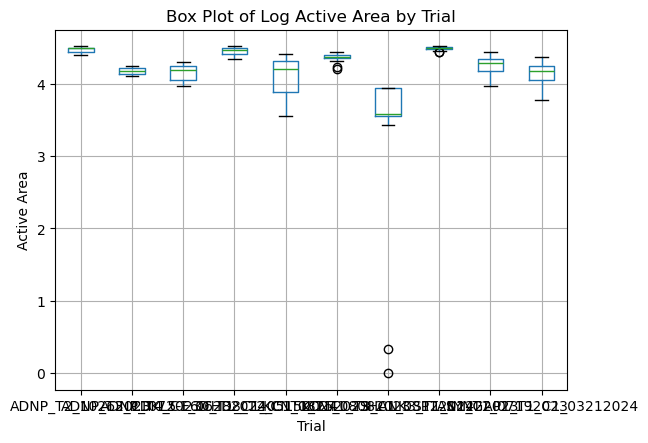

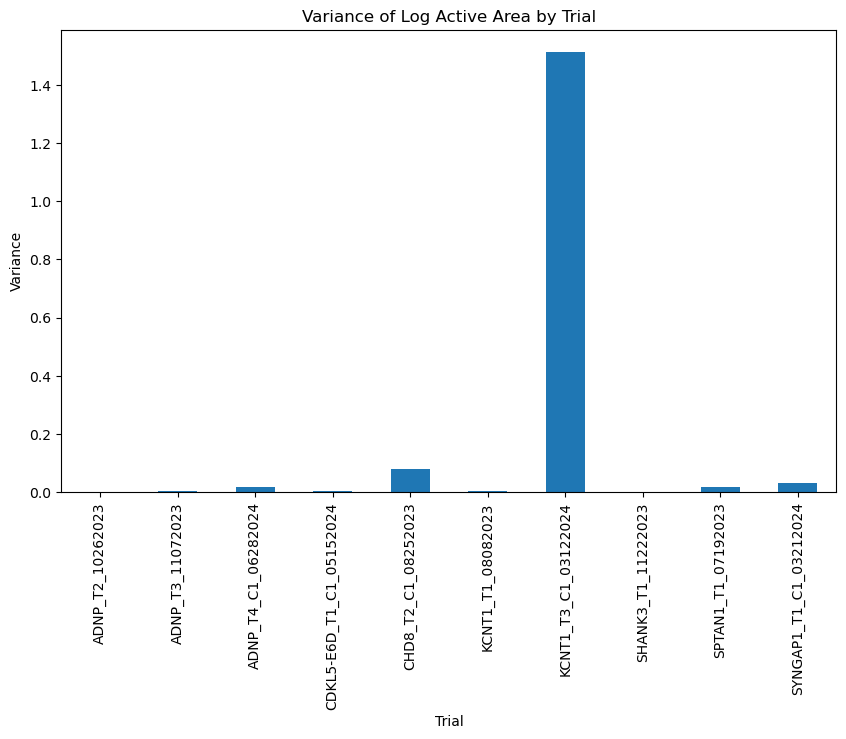

In [88]:
# Plotting Box Plots
plt.figure(figsize=(15, 12))
basic_data.boxplot(column='Log_Active_area', by='Trial')
plt.title('Box Plot of Log Active Area by Trial')
plt.suptitle('')  # Remove default suptitle to clean up plot appearance
plt.xlabel('Trial')
plt.ylabel('Active Area')
plt.show()

# Calculating and Plotting Variances
group_variances = basic_data.groupby('Trial')['Log_Active_area'].var()
plt.figure(figsize=(10, 6))
group_variances.plot(kind='bar')
plt.title('Variance of Log Active Area by Trial')
plt.xlabel('Trial')
plt.ylabel('Variance')
plt.show()

In [89]:
# Try to rule out KCNT1_T1_08082023 do the test again (KCNT1_T1_08082023 is the trial with the largest variance also not pass the quick test last week)
# Select all trials except 'KCNT1_T1_08082023'
selected_trials = basic_data[basic_data['Trial'] != 'KCNT1_T1_08082023']
# Group data by 'Trial' and extract 'Log_Active_area' values for each group
groups = [group['Active_area'].values for name, group in selected_trials.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
bartlett_stat, bartlett_p_value = bartlett(*groups)
print(f"Bartlett’s Test Statistic: {bartlett_stat:.3f}")
print(f"Bartlett’s Test p-value: {bartlett_p_value:.3f}")

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p_value = levene(*groups)
print(f"Levene's Test Statistic: {levene_stat:.3f}")
print(f"Levene's Test p-value: {levene_p_value:.3f}")

# Interpretation
if bartlett_p_value < 0.05:
    print("Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Bartlett's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

if levene_p_value < 0.05:
    print("Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Levene's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

Bartlett’s Test Statistic: 89.187
Bartlett’s Test p-value: 0.000
Levene's Test Statistic: 5.638
Levene's Test p-value: 0.000
Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.
Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.


In [90]:
# Try to rule out KCNT1_T1_08082023 and SYNGAP1_T3_C1_08092024 and do the test again
# Select all trials except 'KCNT1_T1_08082023'
selected_trials = basic_data[basic_data['Trial'] != 'KCNT1_T1_08082023']
# Group data by 'Trial' and extract 'Log_Active_area' values for each group
log_groups = [group['Log_Active_area'].values for name, group in selected_trials.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
bartlett_stat, bartlett_p_value = bartlett(*log_groups)
print(f"Bartlett’s Test Statistic: {bartlett_stat:.3f}")
print(f"Bartlett’s Test p-value: {bartlett_p_value:.3f}")

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p_value = levene(*log_groups)
print(f"Levene's Test Statistic: {levene_stat:.3f}")
print(f"Levene's Test p-value: {levene_p_value:.3f}")

# Interpretation
if bartlett_p_value < 0.05:
    print("Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Bartlett's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

if levene_p_value < 0.05:
    print("Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Levene's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

Bartlett’s Test Statistic: 334.114
Bartlett’s Test p-value: 0.000
Levene's Test Statistic: 3.122
Levene's Test p-value: 0.003
Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.
Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.


***Anova(one way)***

In [91]:
import pandas as pd
from scipy.stats import f_oneway
import numpy as np

# Group data by 'Trial' and extract 'Active_area' values for each group
groups = {name: group['Active_area'].values for name, group in basic_data.groupby('Trial')}

# Perform One-Way ANOVA
anova_stat, anova_p_value = f_oneway(*groups.values())

print(f"ANOVA F-Statistic: {anova_stat:.3f}")
print(f"ANOVA p-value: {anova_p_value:.3f}")

# Interpretation
if anova_p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")


ANOVA F-Statistic: 52.311
ANOVA p-value: 0.000
There is a statistically significant difference between the groups.


***Multivariate Analysis of Variance (MANOVA)***

MANOVA can be used to assess the differences across trials on a combination of dependent variables. It helps determine if the vector of means of the dependent variables is the same across trials.

If assumptions above (normality, homogeneity of variances) are not violated, continue with MANOVA. If the assumptions of ANOVA are violated, consider using non-parametric alternatives like the Kruskal-Wallis test.

Before performing MANOVA, you need to verify that your data meet certain assumptions:

Multivariate Normality: Each group should have multivariate normal distribution.

Test: Use Mardia's test or Henze-Zirkler's test.

Homogeneity of Variance-Covariance Matrices: Covariance matrices should be equal across groups.

Test: Use Box's M test.

Independence of Observations: Each observation should be independent.

Absence of Multicollinearity: Variables should not be highly correlated.

Check: Compute correlation matrix and variance inflation factors (VIF).


Check Multivariate Normality

In [92]:
from pingouin import multivariate_normality

# Group the data by 'Trial'
grouped = basic_data.groupby('Trial')

# Loop through each group and perform the multivariate normality test using HZ method
for name, group in grouped:
    # Perform HZ test
    mvn_test = multivariate_normality(group.iloc[:, 1:], alpha=0.05)
    
    # Access the attributes
    hz_stat = mvn_test.hz
    p_value = mvn_test.pval
    normality = mvn_test.normal
    
    # Print the results
    print(f"Group: {name}")
    print(f"  Henze-Zirkler's HZ Statistic: {hz_stat}, p-value: {p_value}")
    print(f"  Multivariate Normality: {'Yes' if normality else 'No'}\n")

Group: ADNP_T2_10262023
  Henze-Zirkler's HZ Statistic: 0.9031968438314176, p-value: 0.23264077810936779
  Multivariate Normality: Yes

Group: ADNP_T3_11072023
  Henze-Zirkler's HZ Statistic: 16, p-value: 0.0
  Multivariate Normality: No

Group: ADNP_T4_C1_06282024
  Henze-Zirkler's HZ Statistic: 24, p-value: 0.0
  Multivariate Normality: No

Group: CDKL5-E6D_T1_C1_05152024
  Henze-Zirkler's HZ Statistic: 0.963726975673255, p-value: 0.03688214113561
  Multivariate Normality: No

Group: CHD8_T2_C1_08252023
  Henze-Zirkler's HZ Statistic: 0.9154436041303605, p-value: 0.07580143320827465
  Multivariate Normality: Yes

Group: KCNT1_T1_08082023
  Henze-Zirkler's HZ Statistic: 1.0168258459931638, p-value: 0.0018886826735513107
  Multivariate Normality: No

Group: KCNT1_T3_C1_03122024
  Henze-Zirkler's HZ Statistic: 1.1051664258403973, p-value: 2.4459686843222705e-06
  Multivariate Normality: No

Group: SHANK3_T1_11222023
  Henze-Zirkler's HZ Statistic: 1.0200320776593457, p-value: 0.00131549

In [93]:
# log transfrom data
import pandas as pd
import numpy as np
from scipy.stats import boxcox


# Assuming 'basic_data' is your DataFrame
feature_cols = ['Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area',
                'mean_Burst_Peak', 'Number_Bursts', 'mean_Spike_per_Burst']
for feature in feature_cols:
    min_value = basic_data[feature].min()
    print(f"{feature}: Minimum value = {min_value}")
for feature in feature_cols:
    min_value = basic_data[feature].min()
    if min_value <= 0:
        # Shift data
        shift = abs(min_value) + 1e-6  # Adding a small epsilon
        basic_data[feature] += shift
        print(f"Shifted {feature} by {shift}")


Mean_FiringRate: Minimum value = 1.0189364068345
Mean_SpikeAmplitude: Minimum value = 38.78425264
Active_area: Minimum value = 7.545454545
mean_Burst_Peak: Minimum value = 2.56695849
Number_Bursts: Minimum value = 6
mean_Spike_per_Burst: Minimum value = 346.5


In [94]:
lambdas = {}
for feature in feature_cols:
    # Extract the data
    data = basic_data[feature].values
    
    # Apply Box-Cox transformation
    transformed_data, fitted_lambda = boxcox(data)
    
    # Store the transformed data and lambda
    basic_data[f"{feature}_boxcox"] = transformed_data
    lambdas[feature] = fitted_lambda
    print(f"{feature}: Optimal lambda = {fitted_lambda}")


Mean_FiringRate: Optimal lambda = -0.2672498195332838
Mean_SpikeAmplitude: Optimal lambda = 0.5578187592380993
Active_area: Optimal lambda = 2.6248674905259595
mean_Burst_Peak: Optimal lambda = 1.1005362931782519
Number_Bursts: Optimal lambda = 1.0513566339335247
mean_Spike_per_Burst: Optimal lambda = 0.056177848993407345


In [95]:
# test again
transformed_feature_cols = [f"{feature}_boxcox" for feature in feature_cols]
from pingouin import multivariate_normality

grouped = basic_data.groupby('Trial')

for name, group in grouped:
    # Perform HZ test on transformed data
    mvn_test = multivariate_normality(group[transformed_feature_cols], alpha=0.05)
    
    # Access the attributes
    hz_stat = mvn_test.hz
    p_value = mvn_test.pval
    normality = mvn_test.normal
    
    # Print the results
    print(f"Group: {name}")
    print(f"  Henze-Zirkler's HZ Statistic: {hz_stat}, p-value: {p_value}")
    print(f"  Multivariate Normality: {'Yes' if normality else 'No'}\n")


Group: ADNP_T2_10262023
  Henze-Zirkler's HZ Statistic: 0.893782932672891, p-value: 0.129698757712008
  Multivariate Normality: Yes

Group: ADNP_T3_11072023
  Henze-Zirkler's HZ Statistic: 16, p-value: 9.865075727181409e-252
  Multivariate Normality: No

Group: ADNP_T4_C1_06282024
  Henze-Zirkler's HZ Statistic: 24, p-value: 0.0
  Multivariate Normality: No

Group: CDKL5-E6D_T1_C1_05152024
  Henze-Zirkler's HZ Statistic: 0.9245539918762409, p-value: 0.08095162783384907
  Multivariate Normality: Yes

Group: CHD8_T2_C1_08252023
  Henze-Zirkler's HZ Statistic: 0.8324062653665414, p-value: 0.25113008283084287
  Multivariate Normality: Yes

Group: KCNT1_T1_08082023
  Henze-Zirkler's HZ Statistic: 1.0001113321793262, p-value: 0.005400481649296675
  Multivariate Normality: No

Group: KCNT1_T3_C1_03122024
  Henze-Zirkler's HZ Statistic: 1.087756844267479, p-value: 7.5279097040239e-05
  Multivariate Normality: No

Group: SHANK3_T1_11222023
  Henze-Zirkler's HZ Statistic: 0.9475891688326137, p-v

In [96]:
# try manova anyway (normality assumption bviolated)
from statsmodels.multivariate.manova import MANOVA

# Prepare the formula (adjust variable names as per your dataset)
dependent_vars = 'Mean_FiringRate + Mean_SpikeAmplitude + Active_area + mean_Burst_Peak + Number_Bursts + mean_Spike_per_Burst'
formula = f'{dependent_vars} ~ Trial'

# Fit the MANOVA model
manova = MANOVA.from_formula(formula, data=basic_data)
print(manova.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0475 6.0000 138.0000 461.6800 0.0000
         Pillai's trace  0.9525 6.0000 138.0000 461.6800 0.0000
 Hotelling-Lawley trace 20.0730 6.0000 138.0000 461.6800 0.0000
    Roy's greatest root 20.0730 6.0000 138.0000 461.6800 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
          Trial          Value   Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.0095 54.0000 708.2588 19.5809 0.0000
          Pillai's trace 2.8829 54.0000 858.0000 14.6950 0.

In [97]:
# PERMANOVA (since assumption not met, use non-parametric)    
import pandas as pd
import numpy as np
from skbio.stats.distance import DistanceMatrix
from skbio.stats.distance import permanova

# Assuming 'basic_data' is your DataFrame
# Extract the feature matrix (exclude the 'Trial' column)
feature_matrix = basic_data.drop(columns=['Trial']).values

# Extract the grouping vector
grouping_vector = basic_data['Trial'].values

In [98]:
from scipy.spatial.distance import pdist, squareform

# Compute pairwise Euclidean distances
distance_matrix = pdist(feature_matrix, metric='euclidean')

# Convert to a square-form distance matrix
distance_matrix = squareform(distance_matrix)

# Create a DistanceMatrix object required by scikit-bio
dm = DistanceMatrix(distance_matrix)

In [99]:
# Perform PERMANOVA
result = permanova(dm, grouping_vector, permutations=999)
print(result) # suggesting significant differences between groups

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     153
number of groups                 10
test statistic            61.983785
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


A PERMANOVA was conducted using Euclidean distance with 999 permutations to assess differences in neuronal properties among trials. The results indicated a significant effect of Trial on the combined neuronal properties (pseudo-F = 16.45, p = 0.001). However, group dispersion analyses suggested heterogeneity of variances across groups, which may influence the interpretation of the PERMANOVA results.

In [100]:
# find outliers
from sklearn.preprocessing import StandardScaler

# Assuming 'basic_data' is your DataFrame
feature_cols = ['Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area',
                'mean_Burst_Peak', 'Number_Bursts', 'mean_Spike_per_Burst']
X = basic_data[feature_cols].values
X_scaled = StandardScaler().fit_transform(X)


In [101]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute linkage matrix
Z = linkage(X_scaled, method='ward')  # 'ward' minimizes the variance within clusters

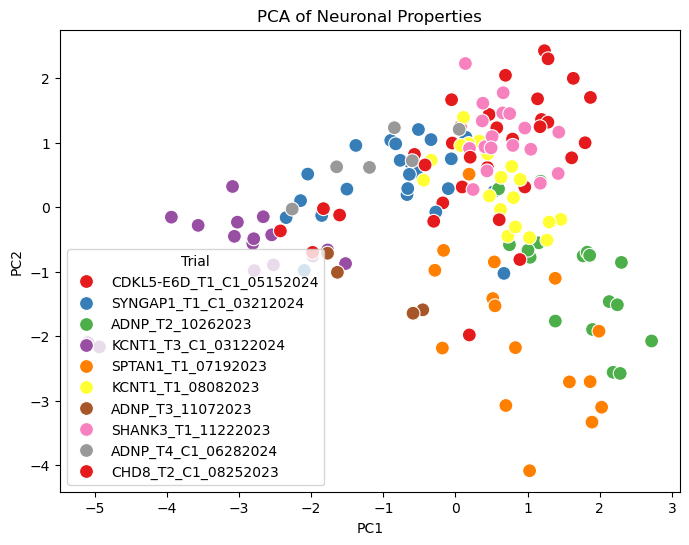

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
basic_data['PC1'] = principal_components[:, 0]
basic_data['PC2'] = principal_components[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Trial', data=basic_data, palette='Set1', s=100)
plt.title('PCA of Neuronal Properties')
plt.show()


In [103]:
# Mahalanobis Distance for Outlier Detection
import numpy as np
from scipy.spatial.distance import mahalanobis

# Calculate the covariance matrix and its inverse
cov_matrix = np.cov(X_scaled, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_distr = X_scaled.mean(axis=0)

# Compute Mahalanobis distance for each observation
distances = []
for i in range(X_scaled.shape[0]):
    x = X_scaled[i]
    md = mahalanobis(x, mean_distr, inv_cov_matrix)
    distances.append(md)

basic_data['Mahalanobis_Distance'] = distances
from scipy.stats import chi2

# Set the significance level
alpha = 0.001
df = X_scaled.shape[1]
threshold = chi2.ppf((1 - alpha), df)
# Flag observations exceeding the threshold
basic_data['Outlier'] = basic_data['Mahalanobis_Distance'] > np.sqrt(threshold)
outliers = basic_data[basic_data['Outlier']]
outliers

,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_Burst_Peak,Number_Bursts,mean_Spike_per_Burst,Log_Active_area,Mean_FiringRate_boxcox,Mean_SpikeAmplitude_boxcox,Active_area_boxcox,mean_Burst_Peak_boxcox,Number_Bursts_boxcox,mean_Spike_per_Burst_boxcox,PC1,PC2,Mahalanobis_Distance,Outlier
73,KCNT1_T3_C1_03122024,3.843511,38.784253,7.939394,3.028571,6,346.500000,0.332134,1.130774,12.001254,87.261614,2.167557,5.305823,6.922890,-5.092892,-2.096405,6.386560,True
77,KCNT1_T3_C1_03122024,3.383015,40.598610,7.545455,2.865964,22,2808.136364,0.000000,1.040185,12.357569,76.302278,1.986286,23.574182,10.006740,-4.935158,-2.165232,5.583580,True
81,SPTAN1_T1_07192023,3.960923,65.249229,68.710000,12.865638,70,33044.828571,4.129785,1.151687,16.645187,25282.499896,14.204853,81.863276,14.137440,1.026976,-4.082632,5.788038,True
92,SPTAN1_T1_07192023,3.660280,82.755784,84.300000,12.650958,82,32993.170732,4.353557,1.096465,19.259178,43244.510238,13.927544,96.851545,14.134634,1.891533,-3.329866,5.992070,True
146,CHD8_T2_C1_08252023,2.093177,76.990772,72.240000,13.273855,53,27456.113210,4.185016,0.670340,18.428077,28835.808515,14.733438,60.861705,13.806740,0.191747,-1.979775,5.136908,True


In [104]:

# show all trials excluding outliers
# Select all trials except the outliers
selected_trials = basic_data[~basic_data['Outlier']]
selected_trials['Trial'].unique()

array(['CDKL5-E6D_T1_C1_05152024', 'SYNGAP1_T1_C1_03212024',
       'ADNP_T2_10262023', 'KCNT1_T3_C1_03122024', 'SPTAN1_T1_07192023',
       'KCNT1_T1_08082023', 'ADNP_T3_11072023', 'SHANK3_T1_11222023',
       'ADNP_T4_C1_06282024', 'CHD8_T2_C1_08252023'], dtype=object)

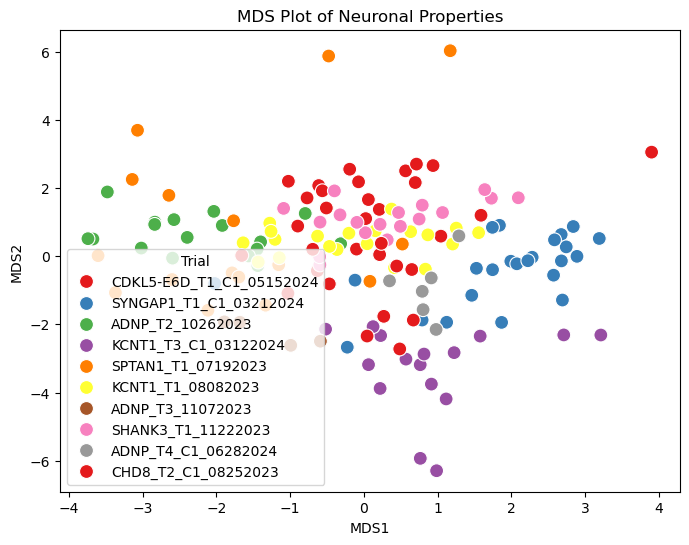

In [105]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)
mds_results = mds.fit_transform(X_scaled)
basic_data['MDS1'] = mds_results[:, 0]
basic_data['MDS2'] = mds_results[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MDS1', y='MDS2', hue='Trial', data=basic_data, palette='Set1', s=100)
plt.title('MDS Plot of Neuronal Properties')
plt.show()


In [106]:
from scipy.stats import t

def grubbs_test(series, alpha=0.05):
    n = len(series)
    mean_y = np.mean(series)
    std_y = np.std(series, ddof=1)
    numerator = max(abs(series - mean_y))
    G_calculated = numerator / std_y
    t_dist = t.ppf(1 - alpha / (2 * n), n - 2)
    G_critical = ((n - 1) / np.sqrt(n)) * np.sqrt(t_dist**2 / (n - 2 + t_dist**2))
    return G_calculated > G_critical

# Apply Grubbs' test to each trial's mean for each feature
for feature in feature_cols:
    trial_means = basic_data.groupby('Trial')[feature].mean()
    if grubbs_test(trial_means):
        print(f"Outlier detected in feature {feature}")


Outlier detected in feature mean_Spike_per_Burst


**Mahalanobis distance and Entropy**


In [108]:
wt_data = pd.read_csv('/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/CSRA/QualityCheck/HomoCheck/wt_data.csv')

In [109]:
# select features
# basic_info = ['DIV', 'Well', 'Chip_ID', 'NeuronType', 'Trial']
basic_info = ['Trial']
# basic_features = ['Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area',
#             'mean_Burst_Peak', 'Number_Bursts', 'mean_BurstDuration']
basic_features = ['Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area',
            'mean_Burst_Peak', 'Number_Bursts', 'mean_Spike_per_Burst']

advanced_features = ['Mean_FiringRate',	'Mean_SpikeAmplitude',	'Active_area', 'mean_IBI', 'Number_Bursts', 'mean_Spike_per_Burst', 'mean_BurstDuration','mean_Burst_Peak',
                     'mean_Burst_Peak_Abs','MeanNetworkISI','MeanWithinBurstISI', 'MeanOutsideBurstISI', 'Fanofactor', 'Burst_Peak_Abs']

In [110]:
# subset entropy_data by selecting all dvis from 14 to 28
entropy_data = wt_data[(wt_data['DIV'] >= 14) & (wt_data['DIV'] <= 28)]

/var/folders/hz/mtvvz9t52kxgqcx423vlrhx00000gn/T/ipykernel_98394/3905045811.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/hz/mtvvz9t52kxgqcx423vlrhx00000gn/T/ipykernel_98394/3905045811.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/hz/mtvvz9t52kxgqcx423vlrhx00000gn/T/ipykernel_98394/3905045811.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/hz/mtvvz9t52kxgqcx423vlrhx00000gn/T/ipykernel_98394/3905045811.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fi

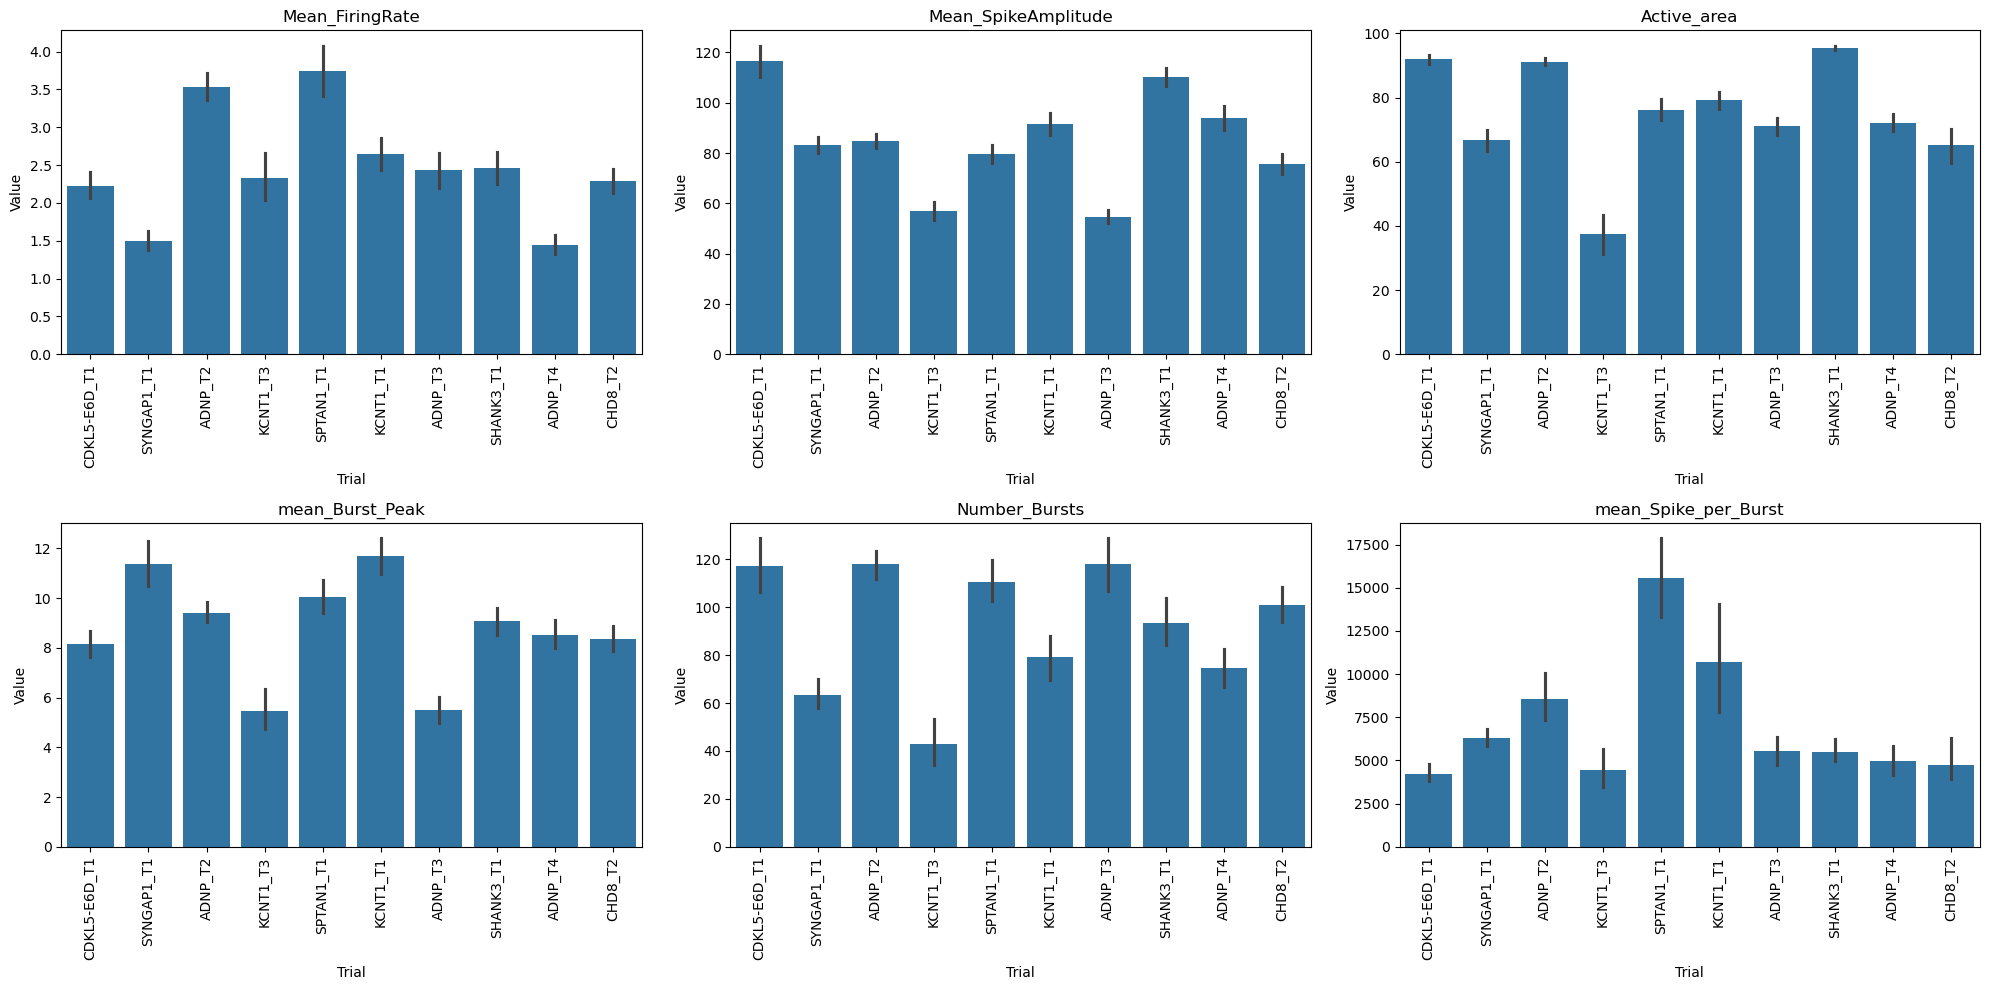

In [111]:
# bar plots for basic features in all trials (in 6 plots)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split 'Trial' names and keep only the parts you want
modify_data = entropy_data.copy()
modify_data['Trial'] = entropy_data['Trial'].apply(lambda x: '_'.join(x.split('_')[:2]))

# Now plot using Seaborn as before
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for ax, feature in zip(axes.flatten(), basic_features):
    sns.barplot(x='Trial', y=feature, data=modify_data, ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('Trial')
    ax.set_ylabel('Value')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()


In [112]:
# check unique divs for each trial
trials = entropy_data['Trial'].unique()
results = {}
for trial in trials:
    trial_data = entropy_data[entropy_data['Trial'] == trial]
    present_divs = [div for div in range(14, 29) if any(trial_data['DIV'] == div)]
    if present_divs:
        results[trial] = f"div {', '.join(map(str, present_divs))} present in trial {trial}"
    else:
        results[trial] = f"No divs from 14 to 28 present in trial {trial}"
for trial, result in results.items():
    print(result)

div 16, 20, 23, 27 present in trial CDKL5-E6D_T1_C1_05152024
div 15, 19, 22, 26 present in trial SYNGAP1_T1_C1_03212024
div 14, 18, 21, 25, 27 present in trial ADNP_T2_10262023
div 14, 16, 21, 24, 28 present in trial KCNT1_T3_C1_03122024
div 16, 20, 23, 27 present in trial SPTAN1_T1_07192023
div 14, 17, 21, 24, 28 present in trial KCNT1_T1_08082023
div 14, 21, 24, 28 present in trial ADNP_T3_11072023
div 16, 20, 23, 27 present in trial SHANK3_T1_11222023
div 14, 18, 21, 25, 28 present in trial ADNP_T4_C1_06282024
div 18, 21, 25, 28 present in trial CHD8_T2_C1_08252023


In [113]:
# cut last div in trial if present more than 4 divs
for trial in trials:
    trial_data = entropy_data[entropy_data['Trial'] == trial]
    div_counts = trial_data['DIV'].nunique()
    if div_counts > 4:
        last_div = trial_data['DIV'].max()
        entropy_data = entropy_data[~((entropy_data['Trial'] == trial) & (entropy_data['DIV'] == last_div))]
        print(f"Removed last DIV {last_div} from trial {trial}")

Removed last DIV 27 from trial ADNP_T2_10262023
Removed last DIV 28 from trial KCNT1_T3_C1_03122024
Removed last DIV 28 from trial KCNT1_T1_08082023
Removed last DIV 28 from trial ADNP_T4_C1_06282024


In [114]:
# check unique divs for each trial
trials = entropy_data['Trial'].unique()
results = {}
for trial in trials:
    trial_data = entropy_data[entropy_data['Trial'] == trial]
    present_divs = [div for div in range(14, 29) if any(trial_data['DIV'] == div)]
    if present_divs:
        results[trial] = f"div {', '.join(map(str, present_divs))} present in trial {trial}"
    else:
        results[trial] = f"No divs from 14 to 28 present in trial {trial}"
for trial, result in results.items():
    print(result)

div 16, 20, 23, 27 present in trial CDKL5-E6D_T1_C1_05152024
div 15, 19, 22, 26 present in trial SYNGAP1_T1_C1_03212024
div 14, 18, 21, 25 present in trial ADNP_T2_10262023
div 14, 16, 21, 24 present in trial KCNT1_T3_C1_03122024
div 16, 20, 23, 27 present in trial SPTAN1_T1_07192023
div 14, 17, 21, 24 present in trial KCNT1_T1_08082023
div 14, 21, 24, 28 present in trial ADNP_T3_11072023
div 16, 20, 23, 27 present in trial SHANK3_T1_11222023
div 14, 18, 21, 25 present in trial ADNP_T4_C1_06282024
div 18, 21, 25, 28 present in trial CHD8_T2_C1_08252023


In [115]:
# select features
basic_info = ['Trial','DIV']
basic_features = ['Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area',
                  'mean_Burst_Peak', 'Number_Bursts', 'mean_Spike_per_Burst']
entropy_data = entropy_data[basic_info + basic_features]

In [116]:
# print rows for each trial
for trial in trials:
    print(f"Trial: {trial}")
    print(entropy_data[entropy_data['Trial'] == trial].to_string())

Trial: CDKL5-E6D_T1_C1_05152024
                       Trial  DIV  Mean_FiringRate  Mean_SpikeAmplitude  Active_area  mean_Burst_Peak  Number_Bursts  mean_Spike_per_Burst
31  CDKL5-E6D_T1_C1_05152024   16         2.045937            76.234165    83.378788         6.676669            136           3641.514706
32  CDKL5-E6D_T1_C1_05152024   16         1.477748            71.472645    76.045455         5.620126            107           2409.364486
33  CDKL5-E6D_T1_C1_05152024   16         2.229030           101.411718    94.242424         5.984474            201           3063.243781
34  CDKL5-E6D_T1_C1_05152024   16         2.651641           120.233404    97.560606         6.991293            244           3164.790984
35  CDKL5-E6D_T1_C1_05152024   16         3.245088            91.494163    95.348485         6.187622            160           5078.306250
36  CDKL5-E6D_T1_C1_05152024   16         1.497266           105.931937    92.000000         6.328128             78           3106.34

In [117]:
# average numbers in same div for each trial
entropy_data = entropy_data.groupby(['Trial', 'DIV']).mean().reset_index()
entropy_data

,Trial,DIV,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_Burst_Peak,Number_Bursts,mean_Spike_per_Burst
0,ADNP_T2_10262023,14,3.282128,73.811046,87.848824,8.009766,99.882353,10298.374574
1,ADNP_T2_10262023,18,4.036184,82.979526,92.741176,10.508045,124.588235,11631.338770
2,ADNP_T2_10262023,21,4.090200,89.056548,94.100588,10.138665,128.529412,8005.942115
3,ADNP_T2_10262023,25,3.440013,87.441833,91.529412,9.630983,121.529412,7198.429634
4,ADNP_T3_11072023,14,2.319795,49.736041,66.515000,4.810329,103.000000,5489.571570
5,ADNP_T3_11072023,21,2.514856,55.512441,73.225000,5.426937,115.500000,4853.371331
6,ADNP_T3_11072023,24,2.313612,54.545208,70.320000,5.452262,124.000000,6457.533058
7,ADNP_T3_11072023,28,2.588263,58.168004,73.990000,6.393037,129.500000,5417.408806
8,ADNP_T4_C1_06282024,14,1.886431,87.203227,75.646465,8.694245,77.833333,8067.230469
9,ADNP_T4_C1_06282024,18,1.519728,99.941506,77.643939,8.853932,81.000000,5099.288149


In [118]:
entropy_trials = entropy_data['Trial'].unique()
feature_cols = basic_features

In [119]:
# 2d matrix (no div info)
entropy_matrix = np.zeros((len(entropy_trials), len(feature_cols)))
# transfrom one trial data to array
for trial in entropy_trials:
    trial_data = entropy_data[entropy_data['Trial'] == trial]
    trial_arr = trial_data[feature_cols].values
    # take the mean of each feature
    mean_data = np.mean(trial_arr, axis=0)
    print(mean_data)
    # store in matrix
    index = np.where(entropy_trials == trial)
    entropy_matrix[index] = mean_data

[3.71213135e+00 8.33222381e+01 9.15550000e+01 9.57186466e+00
 1.18632353e+02 9.28352127e+03]
[2.43413153e+00 5.44904233e+01 7.10125000e+01 5.52064135e+00
 1.18000000e+02 5.55447119e+03]
[1.50507969e+00 9.36844178e+01 7.33705808e+01 8.52582066e+00
 7.97083333e+01 5.23724541e+03]
[2.22660834e+00 1.16522968e+02 9.19727961e+01 8.17600365e+00
 1.17431818e+02 4.23277348e+03]
[2.28853734e+00 7.55495735e+01 6.52142500e+01 8.36076362e+00
 1.01125000e+02 4.71904143e+03]
[2.73099614e+00 8.82424184e+01 7.76590909e+01 1.19634927e+01
 7.46750000e+01 1.21933704e+04]
[2.44262781e+00 5.49684938e+01 3.47376894e+01 5.76141263e+00
 3.87291667e+01 5.33663685e+03]
[2.46564384e+00 1.10260723e+02 9.54877778e+01 9.06802012e+00
 9.35833333e+01 5.51107191e+03]
[3.74280525e+00 7.96646657e+01 7.62368750e+01 1.00393468e+01
 1.10781250e+02 1.55763585e+04]
[1.49655178e+00 8.32912352e+01 6.67559975e+01 1.13872922e+01
 6.34375000e+01 6.30855519e+03]


In [120]:
# with div info

num_trials = len(entropy_trials)
num_features = len(feature_cols)
num_divs = 4
columns_per_trial = num_divs * num_features

# Initialize the entropy matrix
entropy_matrix = np.zeros((num_trials, columns_per_trial))


# Define your trials - assuming your trials are uniquely and sequentially numbered
entropy_trials = sorted(entropy_data['Trial'].unique())

# Populate the matrix
for idx, trial in enumerate(entropy_trials):
    # Filter data for the current trial
    trial_data = entropy_data[entropy_data['Trial'] == trial]
    trial_data = trial_data.sort_values('DIV')  # Ensure the data is in DIV order
    
    # Flatten the trial data across DIVs for each feature
    trial_features = []
    for feature in feature_cols:
        trial_features.extend(trial_data[feature].tolist())  # Append feature data in DIV order
    
    # Store in the matrix
    entropy_matrix[idx, :] = trial_features

# Print the matrix to see the result
print(entropy_matrix)

[[3.28212815e+00 4.03618434e+00 4.09020030e+00 3.44001260e+00
  7.38110463e+01 8.29795256e+01 8.90565478e+01 8.74418328e+01
  8.78488235e+01 9.27411765e+01 9.41005882e+01 9.15294118e+01
  8.00976586e+00 1.05080446e+01 1.01386649e+01 9.63098330e+00
  9.98823529e+01 1.24588235e+02 1.28529412e+02 1.21529412e+02
  1.02983746e+04 1.16313388e+04 8.00594211e+03 7.19842963e+03]
 [2.31979544e+00 2.51485583e+00 2.31361208e+00 2.58826278e+00
  4.97360409e+01 5.55124405e+01 5.45452080e+01 5.81680038e+01
  6.65150000e+01 7.32250000e+01 7.03200000e+01 7.39900000e+01
  4.81032940e+00 5.42693748e+00 5.45226155e+00 6.39303697e+00
  1.03000000e+02 1.15500000e+02 1.24000000e+02 1.29500000e+02
  5.48957157e+03 4.85337133e+03 6.45753306e+03 5.41740881e+03]
 [1.88643113e+00 1.51972768e+00 1.41487499e+00 1.19928496e+00
  8.72032271e+01 9.99415065e+01 9.07716974e+01 9.68212404e+01
  7.56464646e+01 7.76439394e+01 7.04772727e+01 6.97146465e+01
  8.69424515e+00 8.85393242e+00 8.62894597e+00 7.92615911e+00
  7.78

In [121]:
# Reshape the entropy_matrix to separate features and DIVs
reshaped_matrix = entropy_matrix.reshape(10, 6, 4)

# Calculate the average across DIVs for each feature in each trial
dist_matrix = reshaped_matrix.mean(axis=2)
dist_matrix

array([[3.71213135e+00, 8.33222381e+01, 9.15550000e+01, 9.57186466e+00,
        1.18632353e+02, 9.28352127e+03],
       [2.43413153e+00, 5.44904233e+01, 7.10125000e+01, 5.52064135e+00,
        1.18000000e+02, 5.55447119e+03],
       [1.50507969e+00, 9.36844178e+01, 7.33705808e+01, 8.52582066e+00,
        7.97083333e+01, 5.23724541e+03],
       [2.22660834e+00, 1.16522968e+02, 9.19727961e+01, 8.17600365e+00,
        1.17431818e+02, 4.23277348e+03],
       [2.28853734e+00, 7.55495735e+01, 6.52142500e+01, 8.36076362e+00,
        1.01125000e+02, 4.71904143e+03],
       [2.73099614e+00, 8.82424184e+01, 7.76590909e+01, 1.19634927e+01,
        7.46750000e+01, 1.21933704e+04],
       [2.44262781e+00, 5.49684938e+01, 3.47376894e+01, 5.76141263e+00,
        3.87291667e+01, 5.33663685e+03],
       [2.46564384e+00, 1.10260723e+02, 9.54877778e+01, 9.06802012e+00,
        9.35833333e+01, 5.51107191e+03],
       [3.74280525e+00, 7.96646657e+01, 7.62368750e+01, 1.00393468e+01,
        1.10781250e+02, 

***entropy***

In [122]:
# apply entropy based outlier detection
import numpy as np
import scipy

# below are helper functions
def entropy_func(x: float):
    return x * np.log2(x)
def weight_intensity(arr):
    S = scipy.stats.entropy(arr)
    # print(S)
    if S >= 3:
        return arr
    else:
        w = 0.25+S*0.25
        return np.power(arr, w)

def entropy_match(m: float,
                  n: float):
    return entropy_func(m+n) - entropy_func(m) - entropy_func(n)
def normalize_arr(arr: np.array):
    return arr/np.sum(arr)

In [123]:
def unweighted_entropy_score(arr1: np.array, arr2: np.array):
    if len(arr1) != len(arr2):
        raise ValueError('Length of two arrays should be the same')
        return
    arr1 = normalize_arr(arr1)
    arr2 = normalize_arr(arr2)
    sum = 0
    for i in range(len(arr1)):
        sum += entropy_match(arr1[i], arr2[i])
    return sum/2
def weigthed_entropy_score(arr1: np.array, arr2: np.array):
    if len(arr1) != len(arr2):
        raise ValueError('Length of two arrays should be the same')
        return
    arr1 = (normalize_arr(weight_intensity(arr1)))
    arr2 = (normalize_arr(weight_intensity(arr2)))
    sum = 0
    for i in range(len(arr1)):
        sum += entropy_match(arr1[i], arr2[i])
    return sum/2

In [124]:
# Main function to calculate entropy scores for all pairs of rows
def calculate_entropy_scores(entropy_matrix, weighted=False):
    n_rows = entropy_matrix.shape[0]
    scores = np.zeros((n_rows, n_rows))
    for i in range(n_rows):
        for j in range(i + 1, n_rows):
            score = calculate_entropy_score(entropy_matrix[i], entropy_matrix[j], weighted)
            scores[i, j] = score
            scores[j, i] = score  # Symmetric matrix
    return scores

def calculate_entropy_score(arr1, arr2, weighted):
    if len(arr1) != len(arr2):
        raise ValueError('Length of two arrays should be the same')

    arr1 = normalize_arr(arr1)
    arr2 = normalize_arr(arr2)

    if weighted:
        arr1 = weight_intensity(arr1)
        arr2 = weight_intensity(arr2)

    sum_value = 0
    for i in range(len(arr1)):
        sum_value += entropy_match(arr1[i], arr2[i])
    return sum_value

# Example usage
unweighted_scores = calculate_entropy_scores(entropy_matrix)
weighted_scores = calculate_entropy_scores(entropy_matrix, weighted=True)

print("Unweighted Entropy Scores:\n", unweighted_scores)
print("Weighted Entropy Scores:\n", weighted_scores)

Unweighted Entropy Scores:
 [[0.         1.97352497 1.9765726  1.97434069 1.99470869 1.93348151
  1.97139511 1.98645991 1.99153589 1.99289973]
 [1.97352497 0.         1.95483209 1.98592871 1.96234267 1.82771319
  1.95436275 1.98670033 1.97963336 1.97899141]
 [1.9765726  1.95483209 0.         1.9551623  1.96874892 1.91451224
  1.98185939 1.98517917 1.97509181 1.95663776]
 [1.97434069 1.98592871 1.9551623  0.         1.97782007 1.84894882
  1.94818604 1.99020327 1.9621794  1.97989032]
 [1.99470869 1.96234267 1.96874892 1.97782007 0.         1.93805724
  1.95567819 1.98128853 1.97428779 1.98871398]
 [1.93348151 1.82771319 1.91451224 1.84894882 1.93805724 0.
  1.89367799 1.88181875 1.90444621 1.90416256]
 [1.97139511 1.95436275 1.98185939 1.94818604 1.95567819 1.89367799
  0.         1.97846303 1.97561648 1.94873426]
 [1.98645991 1.98670033 1.98517917 1.99020327 1.98128853 1.88181875
  1.97846303 0.         1.98282653 1.98128457]
 [1.99153589 1.97963336 1.97509181 1.9621794  1.97428779 1.9

Unweighted Scores reflect the basic differences in distribution without any adjustments for the underlying entropy within each row. This can be useful for straightforward comparisons where each element is considered equally.
Weighted Scores adjust for the entropy of each row before comparison. The weighting increases the influence of rows with lower inherent entropy (less randomness or more predictability) and decreases the influence of those with higher entropy. This can be particularly insightful when you want to account for the inherent randomness or predictability of the data:
Rows that are intrinsically more predictable (lower entropy) will have their differences emphasized when compared to more chaotic (higher entropy) rows.

In [125]:
import numpy as np
entropy_trials = np.array(entropy_trials)
# Assuming 'weighted_scores' is the weighted entropy scores matrix already loaded
n_rows = weighted_scores.shape[0]
average_scores = np.zeros(n_rows)
max_scores = np.zeros(n_rows)

# Compute the average and max entropy scores for each trial, ignoring self-comparisons (diagonal)
for i in range(n_rows):
    # Include only the upper triangle starting just above the diagonal
    relevant_scores = weighted_scores[i, i+1:]
    # Combine with the lower triangle if necessary
    if i > 0:
        relevant_scores = np.concatenate((weighted_scores[i, :i], relevant_scores))
    average_scores[i] = np.mean(relevant_scores)
    max_scores[i] = np.max(relevant_scores)

# Determine thresholds to identify outliers
mean_avg_score = np.mean(average_scores)
std_avg_score = np.std(average_scores)
threshold = mean_avg_score + 1 * std_avg_score  # Adjust the factor as needed

# Identify outlier trials based on average or maximum scores
outlier_indices = np.where(average_scores > threshold)[0]
outlier_trials = entropy_trials[outlier_indices]

print("Outlier Trials based on Average Scores:", outlier_trials)

Outlier Trials based on Average Scores: ['KCNT1_T1_08082023']


***mahalanobis distance***

In [140]:
# apply mahalanobis distance for outlier detection, using entropy_matrix
import numpy as np
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2


entropy_trials = np.array(entropy_trials)
# Calculate the covariance matrix and its inverse
cov_matrix = np.cov(entropy_matrix, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_distr = np.mean(entropy_matrix, axis=0)

# Compute Mahalanobis distance for each observation
distances = []

for i in range(entropy_matrix.shape[0]):
    x = entropy_matrix[i]
    md = mahalanobis(x, mean_distr, inv_cov_matrix)
    distances.append(md)

# Set the significance level
alpha = 0.001
df = entropy_matrix.shape[1]
threshold = chi2.ppf((1 - alpha), df)

# Flag observations exceeding the threshold
outliers = np.array(distances) > np.sqrt(threshold)
outlier_trials = entropy_trials[outliers]
print("Outlier Trials based on Mahalanobis Distance:", outlier_trials)

Outlier Trials based on Mahalanobis Distance: []


In [127]:
# # Analyze Contribution of Each Feature to Mahalanobis Distance

# # Function to decompose Mahalanobis distance into feature contributions
# def mahalanobis_contributions(x, mean, inv_cov):
#     delta = x - mean
#     contributions = delta * (inv_cov @ delta)
#     return contributions

# # Select a specific trial to analyze
# selected_trial_index = np.where(outliers)[0][0]  # example: first outlier
# selected_trial = entropy_matrix[selected_trial_index]

# # Calculate feature contributions for the selected outlier
# contributions = mahalanobis_contributions(selected_trial, mean_distr, inv_cov_matrix)
# feature_contributions = contributions.reshape(num_features, num_divs).sum(axis=1)  # Sum over divs for each feature

# # Print contributions by feature
# for i, feature in enumerate(feature_cols):
#     print(f"Feature '{feature}' Contribution: {feature_contributions[i]}")

In [128]:
# # Find which feature contributes the most to the Mahalanobis distance

# # Assuming definitions of entropy_matrix, entropy_trials, feature_cols as before

# # Calculate covariance matrix and its inverse for Mahalanobis distance computation
# cov_matrix = np.cov(entropy_matrix, rowvar=False)
# inv_cov_matrix = np.linalg.inv(cov_matrix)
# mean_distr = np.mean(entropy_matrix, axis=0)

# # Compute Mahalanobis distance for each trial
# distances = []
# for i in range(entropy_matrix.shape[0]):
#     x = entropy_matrix[i]
#     md = mahalanobis(x, mean_distr, inv_cov_matrix)
#     distances.append(md)

# # Determine threshold for outliers
# alpha = 0.001
# df = entropy_matrix.shape[1]
# threshold = chi2.ppf((1 - alpha), df)

# # Identify outlier indices
# outliers = np.array(distances) > np.sqrt(threshold)
# outlier_indices = np.where(outliers)[0]
# outlier_trials = entropy_trials[outliers]

# # Print outlier trials
# print("Outlier Trials based on Mahalanobis Distance:")
# for trial in outlier_trials:
#     print(trial)

# # Function to compute Mahalanobis contributions for each dimension
# def mahalanobis_contributions(x, mean, inv_cov):
#     delta = x - mean
#     contributions = delta * (inv_cov @ delta)
#     return contributions

# # Analyze and print contributions for each outlier
# for index in outlier_indices:
#     trial_name = entropy_trials[index]
#     contributions = mahalanobis_contributions(entropy_matrix[index], mean_distr, inv_cov_matrix)
#     feature_contributions = contributions.reshape(-1, num_divs).sum(axis=1)

#     print(f"\nContributions for Trial {trial_name}:")
#     for i, feature in enumerate(feature_cols):
#         print(f"  Feature '{feature}': {feature_contributions[i]:.4f}")


In [129]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import chi2
# from scipy.spatial.distance import mahalanobis

# # Assuming entropy_matrix, entropy_trials, feature_cols, num_divs are properly defined

# # Calculate covariance matrix and its inverse for Mahalanobis distance computation
# cov_matrix = np.cov(entropy_matrix, rowvar=False)
# inv_cov_matrix = np.linalg.inv(cov_matrix)
# mean_distr = np.mean(entropy_matrix, axis=0)

# # Compute Mahalanobis distance for each trial
# distances = [mahalanobis(entropy_matrix[i], mean_distr, inv_cov_matrix) for i in range(entropy_matrix.shape[0])]

# # Determine threshold for outliers
# alpha = 0.001
# df = entropy_matrix.shape[1]
# threshold = chi2.ppf((1 - alpha), df)
# outliers = np.array(distances) > np.sqrt(threshold)
# outlier_indices = np.where(outliers)[0]
# outlier_trials = entropy_trials[outliers]

# print("Outlier Trials based on Mahalanobis Distance:", outlier_trials)

# # Function to compute Mahalanobis contributions for each dimension
# def mahalanobis_contributions(x, mean, inv_cov):
#     delta = x - mean
#     contributions = delta * (inv_cov @ delta)
#     return contributions

# # Collect contributions for all outliers
# contributions_dict = {trial: mahalanobis_contributions(entropy_matrix[i], mean_distr, inv_cov_matrix).reshape(-1, num_divs).sum(axis=1) for i, trial in zip(outlier_indices, outlier_trials)}
# contributions_dict

In [130]:
# # Visualizing contributions
# fig, ax = plt.subplots(figsize=(14, 8))
# width = 0.15  # Fixed width for each bar to make them narrower and closer
# x = np.arange(len(feature_cols))  # the label locations

# # Adjust space between bars by calculating offsets
# offset = width * len(outlier_trials) / 2  # Offset to center the group of bars around the feature tick

# for i, (trial, contributions) in enumerate(contributions_dict.items()):
#     ax.bar(x - offset + i * width, contributions, width, label=trial)

# ax.set_xlabel('Features')
# ax.set_ylabel('Mahalanobis Contribution')
# ax.set_title('Feature Contributions by Outlier Trials')
# ax.set_xticks(x)  # Set x-ticks to be centered for each feature group
# ax.set_xticklabels(feature_cols, rotation=45)  # Optional: rotate labels for better visibility
# ax.legend(title="Outlier Trial", bbox_to_anchor=(1.05, 1), loc='upper left')
# ax.grid(True, linestyle='--')  # Adding grid lines for better readability

# plt.show()

In [131]:
# import numpy as np
# from scipy.stats import chi2

# # Assuming 'entropy_matrix' and other variables from your setup

# # Calculate means and standard deviations for each feature
# means = np.mean(entropy_matrix, axis=0)
# std_devs = np.std(entropy_matrix, axis=0)

# # Calculate standardized residuals
# z_scores = (entropy_matrix - means) / std_devs

# # Calculate contributions to the Mahalanobis distance
# contributions = z_scores**2

# # Now analyze contributions for each outlier
# outlier_contributions = contributions[outliers, :]

# # Print contributions of outliers
# print("Contributions of each feature for outliers:")
# for idx, contrib in enumerate(outlier_contributions):
#     print(f"Outlier Trial {outlier_trials[idx]} Contributions: {contrib}")


In [132]:
np.mean(entropy_matrix, axis=0)

array([2.49413183e+00, 2.61068138e+00, 2.44924494e+00, 2.46398707e+00,
       7.57035413e+01, 8.37411502e+01, 8.83361028e+01, 8.82180683e+01,
       7.08519755e+01, 7.50163149e+01, 7.66171711e+01, 7.51155616e+01,
       7.93764234e+00, 9.51828849e+00, 9.09104052e+00, 8.80289202e+00,
       8.67196999e+01, 8.69883942e+01, 9.75918806e+01, 9.51415270e+01,
       8.74959695e+03, 8.91496563e+03, 6.35792287e+03, 5.55873281e+03])

In [133]:
# # use entropy_matrix

# def calculate_feature_contributions(data_matrix, mean_vector, inv_cov):
#     n_samples = data_matrix.shape[0] # Number of rows
#     n_features = data_matrix.shape[1] # Number of columns
#     contributions = np.zeros((n_samples, n_features))
    
#     for i in range(n_samples):
#         diff = data_matrix[i] - mean_vector
#         # Compute the product for each feature contribution
#         for j in range(n_features):
#             contributions[i, j] = diff[j] * np.dot(inv_cov[j], diff)
#     return contributions
# # Calculate the mean of the distribution for use in Mahalanobis distance
# mean_distr = np.mean(entropy_matrix, axis=0) # mean of each feature

# # Calculate the inverse of the covariance matrix
# cov_matrix = np.cov(entropy_matrix, rowvar=False)
# inv_cov_matrix = np.linalg.inv(cov_matrix)

# # Calculate all contributions
# all_contributions = calculate_feature_contributions(entropy_matrix, mean_distr, inv_cov_matrix)
# all_contributions

In [134]:
# # use entropy_matrix
# def sum_and_rank_contributions(entropy_matrix, all_contributions, outliers, num_features, num_divs):
#     # Calculate the sum of absolute contributions for each feature across all DIVs
#     n_trials = entropy_matrix.shape[0]
#     summed_abs_contributions = np.zeros((n_trials, num_features))
    
#     for i in range(num_features):
#         start_col = i * num_divs
#         end_col = start_col + num_divs
#         summed_abs_contributions[:, i] = np.sum(np.abs(all_contributions[:, start_col:end_col]), axis=1)
    
#     # Extract the contributions for outlier trials
#     outlier_contributions = summed_abs_contributions[outliers, :]
#     outlier_names = np.array(entropy_trials)[outliers]  # Assuming entropy_trials contains trial names

#     # Instead of ranking, just pair features with their contributions
#     contributions_by_outlier = {}
#     for index, trial_name in enumerate(outlier_names):
#         contributions = outlier_contributions[index, :]
#         contributions_by_outlier[trial_name] = [(basic_features[i], contributions[i]) for i in range(num_features)]
    
#     return contributions_by_outlier

# # Assuming we have the required variables already defined
# # basic_features, num_features, num_divs must be defined as per your dataset structure
# contributions_dict = sum_and_rank_contributions(entropy_matrix, all_contributions, outliers, len(basic_features), 4)
# contributions_dict

In [135]:
# use dist_matrix
def calculate_feature_contributions(data_matrix, mean_vector, inv_cov):
    n_samples = data_matrix.shape[0] # Number of rows
    n_features = data_matrix.shape[1] # Number of columns
    contributions = np.zeros((n_samples, n_features))
    
    for i in range(n_samples):
        diff = data_matrix[i] - mean_vector
        # Compute the product for each feature contribution
        for j in range(n_features):
            # contributions[i, j] = diff[j] * np.dot(inv_cov[j], diff)
            # contributions[i, j] = (diff[j] * np.dot(inv_cov[j], diff)) ** 2
            contributions[i, j] = abs(diff[j] * np.dot(inv_cov[j], diff))
    return contributions
# Calculate the mean of the distribution for use in Mahalanobis distance
mean_distr = np.mean(dist_matrix, axis=0) # mean of each feature

# Calculate the inverse of the covariance matrix
cov_matrix = np.cov(dist_matrix, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate all contributions
all_contributions = calculate_feature_contributions(dist_matrix, mean_distr, inv_cov_matrix)
all_contributions

array([[5.50341104, 0.06712126, 1.86644687, 0.69686315, 0.85520077,
        1.7124247 ],
       [0.24141887, 5.46541084, 0.78463251, 3.46944381, 0.12552012,
        0.8401313 ],
       [3.99908085, 0.23493806, 0.0656358 , 0.3010441 , 0.20440494,
        1.53200549],
       [0.07489341, 6.32338484, 3.53510918, 0.1513676 , 2.27983502,
        0.19096515],
       [0.44325959, 0.46637802, 2.92308303, 0.79112656, 1.42135315,
        2.42455615],
       [0.17216593, 0.19952214, 0.3441959 , 0.61162744, 1.01812163,
        1.70835381],
       [0.16409622, 1.46845512, 3.12326814, 1.93622708, 4.14687282,
        0.36533746],
       [0.0360306 , 0.55266124, 5.38481922, 0.17402705, 0.24845779,
        0.17613186],
       [1.17837733, 0.459105  , 0.29697441, 0.62880748, 1.38599388,
        7.85196281],
       [1.32491232, 0.05526652, 0.04053874, 3.4273879 , 0.22740276,
        0.36725424]])

In [136]:
# use dist_matrix, pair and generate dict
def sum_and_rank_contributions(dist_matrix, all_contributions, outliers, basic_features):
    # Extract the contributions for outlier trials
    outlier_contributions = all_contributions[outliers, :]
    outlier_names = np.array(entropy_trials)[outliers]  # Assuming entropy_trials contains trial names

    # Instead of ranking, just pair features with their contributions directly
    contributions_by_outlier = {}
    for index, trial_name in enumerate(outlier_names):
        contributions = outlier_contributions[index, :]
        contributions_by_outlier[trial_name] = [(basic_features[i], contributions[i]) for i in range(len(basic_features))]
    
    return contributions_by_outlier

contributions_dict = sum_and_rank_contributions(dist_matrix, all_contributions, np.array(outliers), basic_features)
contributions_dict

{'KCNT1_T3_C1_03122024': [('Mean_FiringRate', 0.16409622345902777),
  ('Mean_SpikeAmplitude', 1.4684551171974887),
  ('Active_area', 3.123268140647426),
  ('mean_Burst_Peak', 1.9362270799033714),
  ('Number_Bursts', 4.146872815783017),
  ('mean_Spike_per_Burst', 0.3653374636617401)],
 'SPTAN1_T1_07192023': [('Mean_FiringRate', 1.1783773268173525),
  ('Mean_SpikeAmplitude', 0.45910500011374406),
  ('Active_area', 0.29697440587597085),
  ('mean_Burst_Peak', 0.6288074809916743),
  ('Number_Bursts', 1.3859938812938004),
  ('mean_Spike_per_Burst', 7.851962805927371)],
 'SYNGAP1_T1_C1_03212024': [('Mean_FiringRate', 1.324912315769471),
  ('Mean_SpikeAmplitude', 0.05526652202932276),
  ('Active_area', 0.040538736006295775),
  ('mean_Burst_Peak', 3.4273879017673603),
  ('Number_Bursts', 0.2274027565363154),
  ('mean_Spike_per_Burst', 0.36725424416856123)]}

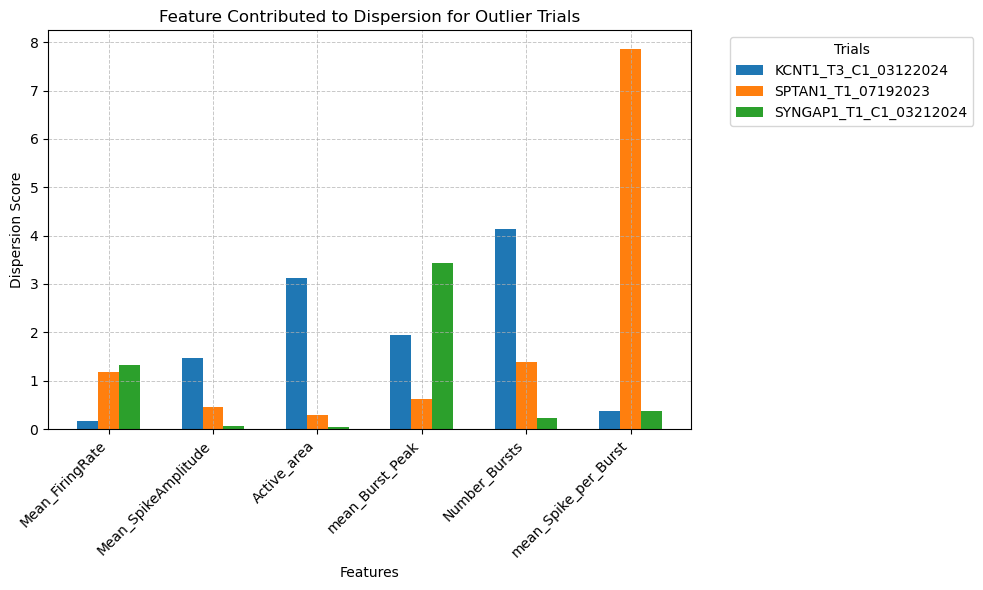

In [137]:
# Plotting the Contributions
trial_names = list(contributions_dict.keys())
basic_features = [feature for feature, _ in contributions_dict[trial_names[0]]]  # Use first trial to get features

# Prepare data for plotting
contributions_data = np.array([[contribution for _, contribution in contributions_dict[trial]] for trial in trial_names])

# Plotting parameters
num_features = len(basic_features)
num_trials = len(trial_names)
x = np.arange(num_features)  # X-axis positions for each feature
bar_width = 0.2  # Width of each bar

plt.figure(figsize=(10, 6))

# Plot each trial's contributions as bars
for i in range(num_trials):
    plt.bar(
        x + i * bar_width,  # Shift bars for each trial
        contributions_data[i],  # Contributions for the current trial
        width=bar_width, 
        label=trial_names[i], 
        align='center'
    )

# Configure x-axis labels and ticks
plt.xticks(x + bar_width, basic_features, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Dispersion Score')
plt.title('Feature Contributed to Dispersion for Outlier Trials')

# Add grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(title='Trials', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [138]:
import numpy as np

num_features = len(basic_features)  # Number of basic features
num_divs = 4  # Number of DIVs as you mentioned

# Assuming all_contributions is calculated as shown in the previous step
# all_contributions shape should be (n_trials, num_features * num_divs)

# Initialize an array to store summed contributions for each feature across all DIVs
summed_contributions = np.zeros((entropy_matrix.shape[0], num_features))

# Sum contributions for each feature across all DIVs
for i in range(num_features):
    # Sum across the columns corresponding to each DIV for the feature i
    start_col = i * num_divs
    end_col = start_col + num_divs
    summed_contributions[:, i] = np.sum(all_contributions[:, start_col:end_col], axis=1)

# Now summed_contributions contains the summed contributions for each feature across all DIVs for each trial
# Average the summed contributions across all trials to identify the most contributing features
average_feature_contributions = np.mean(summed_contributions, axis=0)

# Rank features by their average contribution
feature_ranks = np.argsort(-average_feature_contributions)  # Negative for descending order

print("Features ranked by their average contribution to outliers:")
for index in feature_ranks:
    print(f"{basic_features[index]}: {average_feature_contributions[index]}")


Features ranked by their average contribution to outliers:
Mean_FiringRate: 5.898251512298032
Mean_SpikeAmplitude: 2.9082285842138176
Active_area: 0.0
mean_Burst_Peak: 0.0
Number_Bursts: 0.0
mean_Spike_per_Burst: 0.0


In [139]:
# Assuming entropy_trials is a list of trial names corresponding to rows of entropy_matrix
entropy_trials = sorted(entropy_data['Trial'].unique())  # Ensure this aligns with how you populate entropy_matrix
outlier_trials = np.array(entropy_trials)[outliers]
print("Outlier Trials based on Mahalanobis Distance:", outlier_trials)
# Assuming all_contributions is defined and calculated as previously discussed
for trial in outlier_trials:
    trial_index = np.where(outliers)[0][0]  # Get the index of the trial in entropy_matrix
    trial_data = entropy_matrix[trial_index, :]
    trial_contributions = all_contributions[trial_index, :]
    
    print(f"Trial: {trial}")
    print("Data:", trial_data)
    print("Contributions to Mahalanobis Distance:", trial_contributions)
    print("----------------------------------------------------")
    # For more detailed analysis, assume each feature has contributions from multiple DIVs
    for i, feature in enumerate(basic_features):
        start_col = i * num_divs
        end_col = start_col + num_divs
        feature_contributions = trial_contributions[start_col:end_col]
        print(f"{feature} Contributions from DIVs 14 to 17:", feature_contributions)


Outlier Trials based on Mahalanobis Distance: ['KCNT1_T3_C1_03122024' 'SPTAN1_T1_07192023' 'SYNGAP1_T1_C1_03212024']
Trial: KCNT1_T3_C1_03122024
Data: [2.74510583e+00 2.70748823e+00 2.16153633e+00 2.15638085e+00
 4.91793939e+01 4.89618224e+01 6.13802117e+01 6.03525472e+01
 2.82500000e+01 2.80227273e+01 4.57840909e+01 3.68939394e+01
 5.00199989e+00 5.61147527e+00 5.44581723e+00 6.98635811e+00
 3.10000000e+01 3.05000000e+01 5.79166667e+01 3.55000000e+01
 7.98887013e+03 4.71077021e+03 3.72677941e+03 4.92012766e+03]
Contributions to Mahalanobis Distance: [0.16409622 1.46845512 3.12326814 1.93622708 4.14687282 0.36533746]
----------------------------------------------------
Mean_FiringRate Contributions from DIVs 14 to 17: [0.16409622 1.46845512 3.12326814 1.93622708]
Mean_SpikeAmplitude Contributions from DIVs 14 to 17: [4.14687282 0.36533746]
Active_area Contributions from DIVs 14 to 17: []
mean_Burst_Peak Contributions from DIVs 14 to 17: []
Number_Bursts Contributions from DIVs 14 to 17